# **<a>Assignment_6**
**Anti-cancer activity prediction**

**Name :** Karim Gamal Mahmoud Mohamed

**ID : 21kgmm**

# **<a>The Questions**
I'd rather start with this part because I don't know when the code will end 😆

1.   ## **Based on the provided template, describe the format of the input file (sdf file).?**

> **Ans:** A data structure file is used as the input (SDF). It contains information about the chemical composition of a molecule. The positions of individual atoms in a chemical molecule, as well as the connections between them, are stored in SDF files. The symbol \$$$$ is used to distinguish between distinct compounds.

> The name/title of the substance is mentioned in the header of each sample/molecule. Details on the quantity of Atoms, the version number, and connections, among other things, are included in other sections. The atom block contains information about the compound's ingredients. The bond block describes the bonding structure of the chemical. In this assignment, both of these blocks are used to acquire information about the compound and record it as edges and nodes. In a chemical compound, each node represents an atom.








2.  ## **What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?**

> **Ans:** This network's input tensors are:

> 1. The data in tokenized form contains the chemical molecule's nodes. The nodes of each compound are obtained, tokenized using the tokenizer, then padded using the pad sequence technique. The form of each batch is (batch size * max len nodes). where batch size is the total number of samples in the batch and max len nodes is the maximum length of tokenized nodes after padding.

> 2. The form of an edge (sum of all edges,2) is the input tensor that provides information about atom connections. The sum(no. of edges of each sample) of all edges is used to calculate the batch size. Like sample 1 has 21, sample 2 has 20, and sample 3 has 40 edges in a batch of three samples. As a result, the edge tensor's size is reduced (81,2).

> 3. The segmented mean input tensor, or node2graph, contains information about segmented ids. (batch size*max len nodes) is the shape of each batch, with batch size equaling the number of samples in the batch and max len nodes equaling the length of tokenized nodes after padding.



---

3.  ## **For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?**

> **Ans:** (gnn_out) The shape of the gnn out is defined as (batch size node dimension,hidden layers), where batch size node dimension is the dimension of the input data (node) vector (dimension of tokenized vector for the complete batch). It represents the model's aggregation output for each hidden layer.

> Dim of avg : Using the segmented ids, the gnn out's segmented mean is determined. For each sample in the batch size, gnn out returns (tokenized vector dimension, hidden layers). Each sample is allocated a segment id. As a result, by taking the mean of all the output data in the gnn out output, segment mean represents one sample with one integer for each hidden layer. The final output of the average tensor is of the shape (batch size, hidden layer). It's a technique for collecting data for each sample and presenting it as mean data.



---

4. ##  **What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?**

> **Ans:** Segment_mean: Computes the average of data with the same segmented ids, or Computes the mean along segments of a tensor.

> Reduce_mean: Given parameters, computes the mean of elements across dimensions of a tensor.

> dim of pred : The final result (pred) reveals if a chemical compound is effective in killing cancer cells. The shape of pred is (batch size,1). As a result, each sample's final output is a number that represents the probability of each chemical compound's activity.


* > [Source](https://www.tensorflow.org/api_docs/python/tf/math/segment_mean)

* > [Another source](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean) 




---

5. ##  **What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?


> **Ans:** For the number of layers, the default template uses the gcn network default option. The default layer, as mentioned in the documentation, is [4]. The default message conveyance technique is rgcn (Graph convolution layers). Using several gcns helps to capture all graph complexity more efficiently, resulting in a better model.



---

# <a>Problem Formulation

### **Define the problem:**

> This is a graph-based binary classification task which is to use the chemical structure of a chemical compound to predict its anticancer activity .


> In terms of lung cancer cell resistance, the chemical compound can be either + or -, and hence is labelled as 0 or 1.

### **What is the input?**
> The data is presented in the form of a graph that depicts the chemical structure of the compound. Each data sample contains information about the atoms in the molecule, as well as their connections. The input features of this task are atoms and connections.



### **What is the output?**
> The output is a prediction of a chemical compound's anticancer activity based on the chemical structure of the substance. It is possible for the chemical compound to be + or - [1, 0]

### **What data mining function is required?**
 
> **1-  Importing the Libraries & Loading the Data** 

> **2- Data exploration :** we used pandas profiling  and matplotlib libraries are used to plot the data.

> **3- Data Preprocessing**: Nodes are represented by characters such as `['O','N','S'...]` (atoms). As a result, it's considered as a series of text data, with tokenizing the data before adding the embeddig layer being the best way to characterise it.

>> ### **Preprocessing trial_1 :** 
>> * We will set the default preprocessing as it is.



>> ### **Preprocessing trial_2 :**
>> * Upsampling dataset to have balanced classes.

>> * Note : I tried to perform the Upsampling twice, the first time on the whole data and the second time only on the training data set without the validation data set




> ### **4- Aggregation Methods:**
1.   GGNN Aggregation Method
2.   RGAT Aggregation Method
3.   RGIN Aggregation Method
4.   GNN_Edge_MLP Aggregation Method
5.   RGCN Aggregation Method

>> * Note : The probability of the output class is estimated using a graph convolutional network in this task. Message passing mechanisms are implemented in a variety of ways in various methodologies.



> **5- Predict the category for test_new.csv to be sumbitted on Kaggle**


### **What could be the challenges?**


> How to handle with the sdf file format, resampling, finding the appropriate model architecture, set the best hyperparameters, avoiding overfitting or undefitting, and improving model performance. 

### **What is the impact?**


> The impact of this task could help to predict a chemical compound's anticancer activity based on the chemical structure of the compound.






### **What is an ideal solution?**

> My trial (6) : GGNN with Upsampling on the training data and the validation data set, significantly assisted me in achieving the best AUC score of (~0.87).



---

### **What is the experimental protocol used and how was it carried out? How did we tune hyper-parameters in the template? What is the search space and what is the criteria to determine good/bad hyper-parameters?**

> As we mentioned earlier in the question “What is the required data extraction function”  and I also mentioned about it in each trial separately.

---

# <a> Data Preprocessing trial 1</a>

>##### Note: In this assignment i was working on several trials throughout different notebooks because some model takes long time to train and to save my time. so, you will see some duplicates in this notebook. But all of thim works fine.

> ## <a> Trial_0 </a>

>## Install some Packages

In [1]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8794 sha256=f5c35371c783e8c02a4c4182328008fd6ee80c145d2bcd1d6efad7e4a4008225
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.30-py3-none-any.whl size=7898 sha256=3a6d108fdf29f083b0e38d3b7f37b96753165a560f8d3235b238c772cbc3c902
  Stored in directory: /root/.cache/pip/wheels/a3/f2/98/ed93cdaedf25eed75a5c5b38fc716a9e3a886e2e0169e3f182
  Created wheel for compress-json: filename=compress_json-1.0.5-py3-none-any.whl size=4899 sha256=296a32c053606dc70c2b207f2caa9159ef5a5ef89236ef64e396b230f784bfbe
  Stored in directory: /root/.cache/pip/wheels/9d/c9/7d/7840b772f45f7870c08cb0df4eefa994af4208bbc046856b41
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [2]:
# install kaggle package
!pip install kaggle

## Read SDF format data (structured-data format)

In [3]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
# download the data from kaggle
!kaggle competitions download -c cisc873-dm-f22-a6

  0% 0.00/3.86M [00:00<?, ?B/s]
100% 3.86M/3.86M [00:00<00:00, 229MB/s]


In [5]:
# unzip the data 
! unzip cisc873-dm-f22-a6.zip

Archive:  cisc873-dm-f22-a6.zip
  inflating: gcnn-template.ipynb     
  inflating: test_x.sdf              
  inflating: train.sdf               


In [6]:
#importing libraries
import numpy as np   
# IPython/Jupyter Notebook progressbar decorator for iterators.
from tqdm.notebook import tqdm 

# fun. to read sdf file, the chemical composition of a molecule is saved as (structure data file)
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file
        content = rf.read()       #reading the contents of the file
    # Split the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$') 
    
    #fun. to read each molecule configuration
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        #loop over each line
        for l in lines:           
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            # for Atom block 
            if l.startswith('    '):   
                feature = l.split()
                #node feature (atom) as O,C etc.
                node = feature[3] 
                #appending nodes    
                nodes.append(node) 
            # bond block tells about connections between atoms   
            elif l.startswith(' '):   
                # splitting line
                lnk = l.split()       
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    #appending links
                    links.append((int(lnk[0])-1, int(lnk[1])-1,))
        return nodes, np.array(links), label #return nodes, links and label
    # parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  

In [7]:
from sklearn.model_selection import train_test_split
#reading train.sdf file
training_set = read_sdf('train.sdf')
#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [8]:
#reading test file
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

## Visualizing/Inspecting a Sample

* Each sample's data is included in the training set (molecule). There are three elements in each sample array. The first part contains text data on the atoms, the second element contains information about the connections, and the third element contains information about the labels for each molecule.

In [9]:
# libraries for displaying network of molecule
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [10]:
# fun. to visualize the compound graph atoms are given as nodes the connections are defined as edges

def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0] #atoms as nodes
    edges = sample[1] #connections as edges
    #create dictionary for labels of the nodes
    labeldict={} 
    #create array for each node color
    node_color=[] 
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i)   #adding node to the graph each node as (0,1,2..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #color coding

    # a list of nodes for each edge by adding egde to the graph from one connection to other connection
    for e in edges:
        G.add_edge(e[0], e[1])

    #drawing the graph with labels for nodes as atoms and connections as edges    
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    #returns graph
    return G

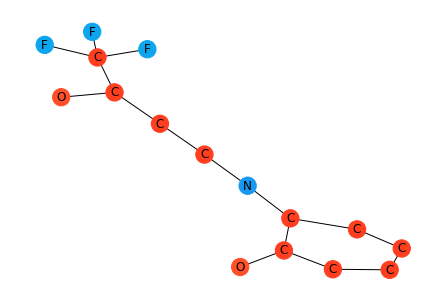

In [11]:
#displaying one sample
plt.clf()
visualize(training_set[0])

In [12]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 21270
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


## Preprocessing
> * Tokenizing the nodes(atoms)

In [13]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer

#vocabulary size
max_vocab = 500
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [14]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
# random seed
random.seed(0) 


# fun. to prepare single batch set Samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples] # Nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)   # tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post')  # pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1] #shape: (num of samples, number of nodes) 
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]  #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non-zero
    # definition for segmented_ids
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  
    
    all_nodes = np.reshape(sample_nodes, -1)  #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)         #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples]) 


#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:                 #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #randomly shuffling
        l = len(dataset)  #length of dataset
        for ndx in range(0, l, batch_size):  #loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)   #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break

In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=10):
    for k,v in train_batch[0].items(): #k: labels, v: values
        print(k)        
        print(v)
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

In [16]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

#for deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput

#GGNN, RGCN,RGAT, RGIN, GNN-Edge-MLP, GNN-FiLM
from  tf2_gnn.layers.message_passing import gnn_edge_mlp,gnn_film,rgat,rgin,rgcn,ggnn

     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 73 kB 1.8 MB/s 
     |████████████████████████████████| 346 kB 48.7 MB/s 
     |████████████████████████████████| 134 kB 47.4 MB/s 
     |████████████████████████████████| 1.2 MB 43.8 MB/s 
     |████████████████████████████████| 462 kB 50.7 MB/s 
     |████████████████████████████████| 3.6 MB 38.5 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 178 kB 49.4 MB/s 
     |████████████████████████████████| 85 kB 4.1 MB/s 
     |████████████████████████████████| 41 kB 512 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [17]:
#importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.math import segment_mean # to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model # layers and model
from tensorflow.keras.layers import Embedding, Dense # layers
from tensorflow.keras.optimizers import Adam # optimizer


# The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.
#Input layer for nodes (tokenized text data) , eg. [440]
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge data, eg. [257,2]
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids , eg. [440]
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 #defining hidden dimension of the gnn layer
#params['message_calculation_class']

#gnn layer with defined hyperparameters
gnn_layer = GNN(params)

#gnn output layer 
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

#building model inputs are data,edges and node2graph
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
#printing summary of the model
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                      

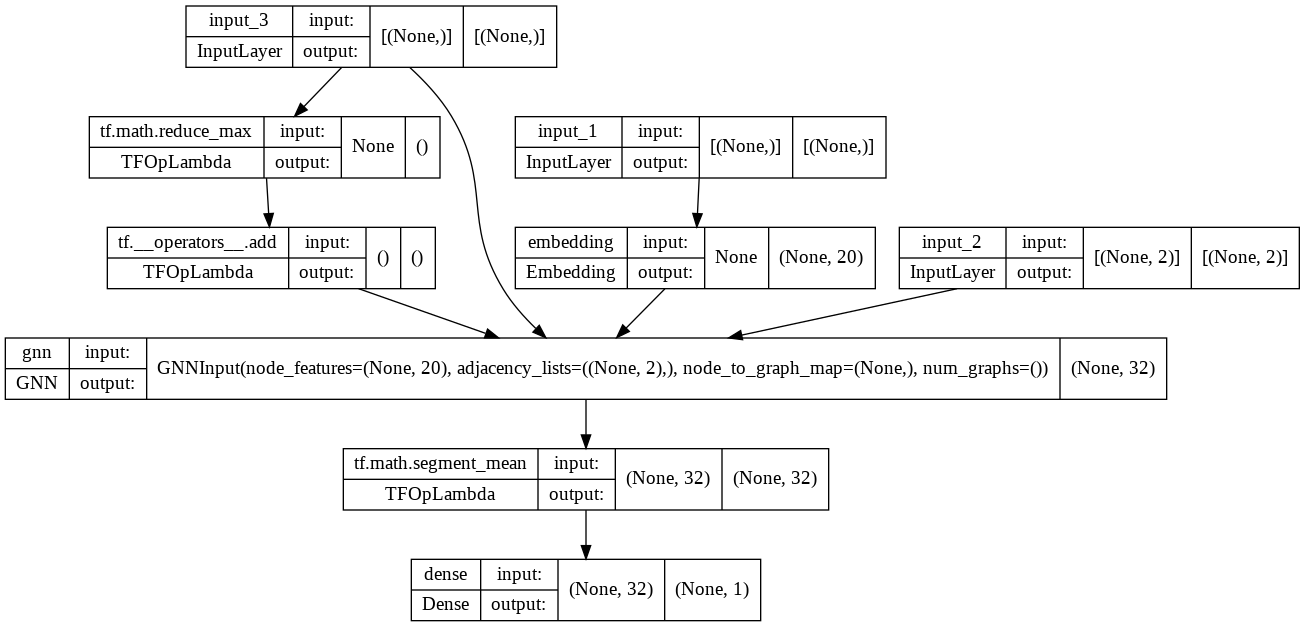

In [18]:
# This enables in-line display of the model plots in notebooks.
tf.keras.utils.plot_model(model, show_shapes=True)

In [19]:
# we will use Adam Optimizer.
model.compile(
    optimizer = 'adam',
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [20]:
%%time
import math

batch_size = 16
#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

history = model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a larg

1330/1330 [==============================] - 42s 27ms/step - loss: 0.2360 - auc: 0.4935 - val_loss: 0.1933 - val_auc: 0.6116
Epoch 2/10
1330/1330 [==============================] - 24s 18ms/step - loss: 0.1916 - auc: 0.6344 - val_loss: 0.1802 - val_auc: 0.6879
Epoch 3/10
1330/1330 [==============================] - 22s 17ms/step - loss: 0.1866 - auc: 0.6648 - val_loss: 0.1827 - val_auc: 0.6963
Epoch 4/10
1330/1330 [==============================] - 22s 17ms/step - loss: 0.1833 - auc: 0.6898 - val_loss: 0.1860 - val_auc: 0.6930
Epoch 5/10
1330/1330 [==============================] - 22s 17ms/step - loss: 0.1817 - auc: 0.6993 - val_loss: 0.1802 - val_auc: 0.6948
Epoch 6/10
1330/1330 [==============================] - 23s 17ms/step - loss: 0.1789 - auc: 0.7177 - val_loss: 0.1749 - val_auc: 0.7347
Epoch 7/10
1330/1330 [==============================] - 22s 17ms/step - loss: 0.1765 - auc: 0.7351 - val_loss: 0.1715 - val_auc: 0.7351
Epoch 8/10
1330/1330 [==============================] - 23s

> ## Virtualization Method

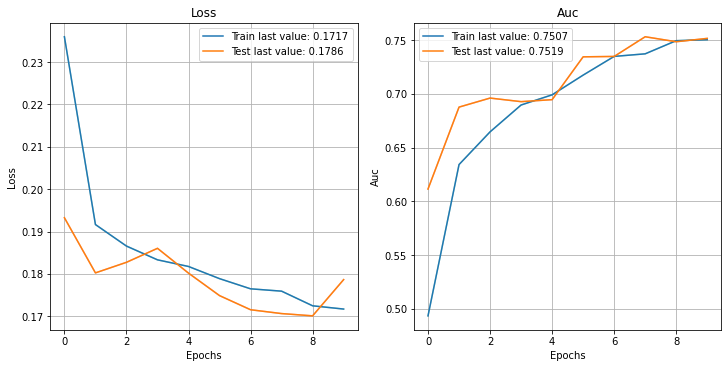

In [21]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

def Virt_fun(history):
  # show the history of our model
  show_history(history)
  plot_history(history, path="standard.png")
  plt.close()

# calling this fun.
Virt_fun(history)

In [22]:
# to predict our model
y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
# to reshape y_pred
y_pred = np.reshape(y_pred, -1)
y_pred.shape

(12326,)

In [23]:
y_pred

array([0.29264474, 0.21832548, 0.03023877, ..., 0.02126885, 0.04339422,
       0.04310087], dtype=float32)

> I was expecting an AUC score of ~0.75 because it gives me that score on local , but my score on kaggle was ~0.79 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset

In [24]:
import pandas as pd 
# create datafram with y_pred & id columns
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
# convert the dataframe to csv file
submission.to_csv('sample_submission_trial_0.csv')

In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_0.csv")

# <a>Trial_1 with GGNN</a>

> (Graph Neural Networks)
Some literature may refer to this original GNN model as Recurrent Graph Neural Network (RecGNN). In this section, we stay with the term GNN. The general concept of GNN is to exchange information (message) constantly with its neighbors until a stable equilibrium is reached. This behaves similarly to an RNN as weights are shared in each recurrent step. In contrast, GCN does not share weights between their hidden layers.

> The propagation rule for GNN can be generalized as:

>![](https://miro.medium.com/max/1400/1*NGh6tOhoGHcdQ0qdkmPBrA.png)

> where hᵥ⁽⁰⁾, for t=0, is initialized randomly. At each time step t, we propagate the hidden layer feature from its neighbors to update the hidden features of a node. For h to reach a stable state, the parameterized function f must be a contraction mapping. It shrinks the distance between two points after projecting them into a latent space. But many GNN implementations are more specific and f does not use all the parameters on the R.H.S. So for the next three sections, let’s overview some of these GNN implementations.

> Gated Graph Neural Network (GGNN): The hidden state is updated by the input and the last hidden state.

> GGNNs are also considered unrolled recurrences for a fixed number of steps, while using backpropagation through time with modern optimization methods. Such models have limited restrictions, while there can be specific types of data as input for the problem solution. As a result, the gating of the graph network makes the whole propagation a more complete systematic structure.

>![](https://miro.medium.com/max/1400/1*2rYuv_S_2-uF80fRHC7PGQ.png)




## Read SDF format data (structured-data format)

In [26]:
#importing libraries
import numpy as np   
# IPython/Jupyter Notebook progressbar decorator for iterators.
from tqdm.notebook import tqdm 

# fun. to read sdf file, the chemical composition of a molecule is saved as (structure data file)
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file
        content = rf.read()       #reading the contents of the file
    # Split the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$') 
    
    #fun. to read each molecule configuration
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        #loop over each line
        for l in lines:           
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            # for Atom block 
            if l.startswith('    '):   
                feature = l.split()
                #node feature (atom) as O,C etc.
                node = feature[3] 
                #appending nodes    
                nodes.append(node) 
            # bond block tells about connections between atoms   
            elif l.startswith(' '):   
                # splitting line
                lnk = l.split()       
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    #appending links
                    links.append((int(lnk[0])-1, int(lnk[1])-1,))
        return nodes, np.array(links), label #return nodes, links and label
    # parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  

In [27]:
from sklearn.model_selection import train_test_split
#reading train.sdf file
training_set = read_sdf('train.sdf')
#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [28]:
#reading test file
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

## Visualizing/Inspecting a Sample

In [29]:
# libraries for displaying network of molecule
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [30]:
# fun. to visualize the compound graph atoms are given as nodes the connections are defined as edges

def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0] #atoms as nodes
    edges = sample[1] #connections as edges
    #create dictionary for labels of the nodes
    labeldict={} 
    #create array for each node color
    node_color=[] 
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i)   #adding node to the graph each node as (0,1,2..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #color coding

    # a list of nodes for each edge by adding egde to the graph from one connection to other connection
    for e in edges:
        G.add_edge(e[0], e[1])

    #drawing the graph with labels for nodes as atoms and connections as edges    
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    #returns graph
    return G

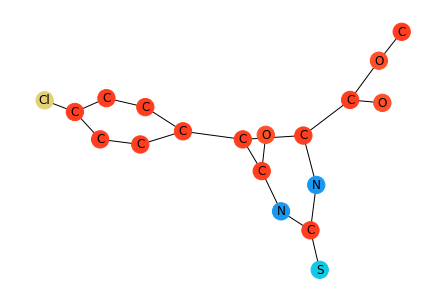

In [31]:
#displaying one sample
plt.clf()
visualize(training_set[0])

In [32]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 21270
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


## Preprocessing
> * Tokenizing the nodes(atoms)
> * With Different vocabulary size

In [33]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer

#vocabulary size
max_vocab = 400
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [34]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
# random seed
random.seed(0) 


# fun. to prepare single batch set Samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples] # Nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)   # tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post')  # pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1] #shape: (num of samples, number of nodes) 
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]  #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non-zero
    # definition for segmented_ids
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  
    
    all_nodes = np.reshape(sample_nodes, -1)  #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)         #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples]) 


#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:                 #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #randomly shuffling
        l = len(dataset)  #length of dataset
        for ndx in range(0, l, batch_size):  #loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)   #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break

In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=10):
    for k,v in train_batch[0].items(): #k: labels, v: values
        print(k)        
        print(v)
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

In [36]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

#for deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput

#GGNN, RGCN,RGAT, RGIN, GNN-Edge-MLP, GNN-FiLM
from  tf2_gnn.layers.message_passing import gnn_edge_mlp,gnn_film,rgat,rgin,rgcn,ggnn

In [41]:
#importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.math import segment_mean # to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model # layers and model
from tensorflow.keras.layers import Embedding, Dense # layers
from tensorflow.keras.optimizers import Adam # optimizer


# The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.
#Input layer for nodes (tokenized text data) , eg. [440]
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge data, eg. [257,2]
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids , eg. [440]
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["message_calculation_class"] = 'GGNN'
params["hidden_dim"] = 128 #defining hidden dimension of the gnn layer
params["num_layers"] = 8
params["dense_every_num_layers"] = 8
params["num_heads"] = 4
params["num_aggr_MLP_hidden_layers"] = 1
params["film_parameter_MLP_hidden_layers"] = 1

#gnn layer with defined hyperparameters
gnn_layer = GNN(params)

#gnn output layer 
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

#building model inputs are data,edges and node2graph
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
#printing summary of the model
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None,)]            0           []      

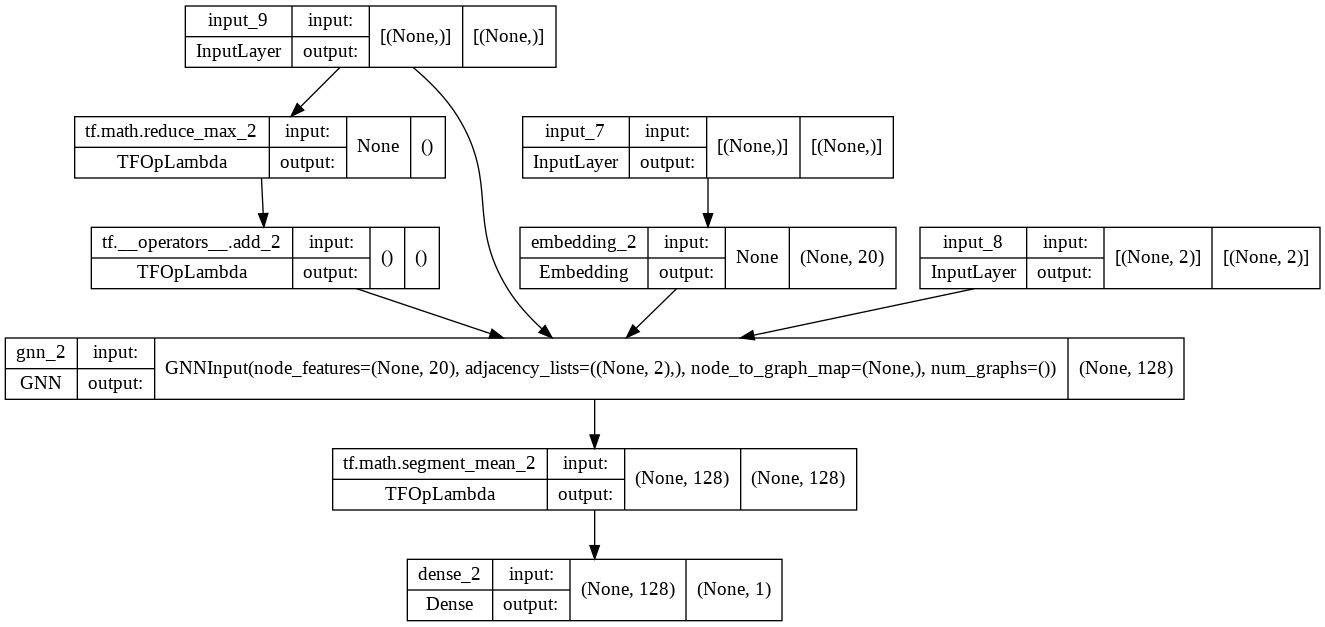

In [42]:
# This enables in-line display of the model plots in notebooks.
tf.keras.utils.plot_model(model, show_shapes=True)

In [43]:
# we will use Adam Optimizer.
model.compile(
    optimizer = 'adam',
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [44]:
%%time
import math

batch_size = 32
#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

# fit our model with 20 epocks and different batch_size.
history = model.fit(
    # gen_batch for training data set
    gen_batch(training_set, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batchs,
    epochs=20,
    # gen_batch for validation data set
    validation_data=gen_batch(validation_set, batch_size=32, repeat=True),
    validation_steps=num_batchs_validation,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')],
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_7/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_6/embedding_lookup_grad/Cast:0",

665/665 [==============================] - 58s 74ms/step - loss: 0.1987 - auc: 0.6130 - val_loss: 0.1884 - val_auc: 0.6617
Epoch 2/20
665/665 [==============================] - 53s 80ms/step - loss: 0.1870 - auc: 0.6489 - val_loss: 0.1794 - val_auc: 0.7016
Epoch 3/20
665/665 [==============================] - 49s 73ms/step - loss: 0.1838 - auc: 0.6795 - val_loss: 0.1877 - val_auc: 0.7013
Epoch 4/20
665/665 [==============================] - 49s 74ms/step - loss: 0.1841 - auc: 0.6760 - val_loss: 0.1866 - val_auc: 0.6943
Epoch 5/20
665/665 [==============================] - 49s 73ms/step - loss: 0.1831 - auc: 0.6865 - val_loss: 0.1863 - val_auc: 0.6991
Epoch 6/20
665/665 [==============================] - 56s 85ms/step - loss: 0.1803 - auc: 0.6965 - val_loss: 0.1800 - val_auc: 0.7059
Epoch 7/20
665/665 [==============================] - 49s 73ms/step - loss: 0.1786 - auc: 0.7095 - val_loss: 0.1711 - val_auc: 0.7342
Epoch 8/20
665/665 [==============================] - 49s 73ms/step - los

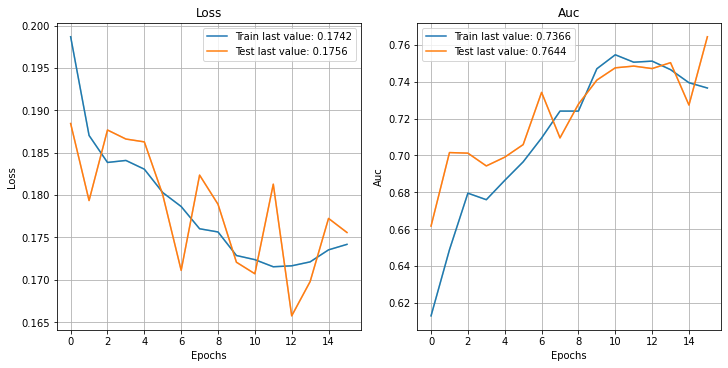

In [45]:
# just call this cell
Virt_fun(history)

In [46]:
# to predict our model
y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
# to reshape y_pred
y_pred = np.reshape(y_pred, -1)
y_pred.shape

(12326,)

In [47]:
y_pred

array([0.26650333, 0.06610817, 0.07486007, ..., 0.02159902, 0.2833547 ,
       0.04105962], dtype=float32)

> I was expecting an AUC score of ~0.76 because it gives me that score on local , but my score on kaggle was ~0.80 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model wasn't good and but the model suffering from the unbalanced dataset.

> let's try another Aggregation method.

In [48]:
import pandas as pd 
# create datafram with y_pred & id columns
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
# convert the dataframe to csv file
submission.to_csv('sample_submission_trial_1.csv')

In [49]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_2 with RGAT</a>

> (Relational Graph Attention Networks) : We investigate Relational Graph Attention Networks, a class of models that extends non-relational graph attention mechanisms to incorporate relational information, opening up these methods to a wider variety of problems. A thorough evaluation of these models is performed, and comparisons are made against established benchmarks. To provide a meaningful comparison, we retrain Relational Graph Convolutional Networks, the spectral counterpart of Relational Graph Attention Networks, and evaluate them under the same conditions. We find that Relational Graph Attention Networks perform worse than anticipated, although some configurations are marginally beneficial for modelling molecular properties. We provide insights as to why this may be, and suggest both modifications to evaluation strategies, as well as directions to investigate for future work.

> ![](https://raw.githubusercontent.com/babylonhealth/rgat/master/images/argat.png)




## Read SDF format data (structured-data format)

In [50]:
#importing libraries
import numpy as np   
# IPython/Jupyter Notebook progressbar decorator for iterators.
from tqdm.notebook import tqdm 

# fun. to read sdf file, the chemical composition of a molecule is saved as (structure data file)
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file
        content = rf.read()       #reading the contents of the file
    # Split the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$') 
    
    #fun. to read each molecule configuration
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        #loop over each line
        for l in lines:           
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            # for Atom block 
            if l.startswith('    '):   
                feature = l.split()
                #node feature (atom) as O,C etc.
                node = feature[3] 
                #appending nodes    
                nodes.append(node) 
            # bond block tells about connections between atoms   
            elif l.startswith(' '):   
                # splitting line
                lnk = l.split()       
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    #appending links
                    links.append((int(lnk[0])-1, int(lnk[1])-1,))
        return nodes, np.array(links), label #return nodes, links and label
    # parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  

In [51]:
from sklearn.model_selection import train_test_split
#reading train.sdf file
training_set = read_sdf('train.sdf')
#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [52]:
#reading test file
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

## Visualizing/Inspecting a Sample

In [53]:
# libraries for displaying network of molecule
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [54]:
# fun. to visualize the compound graph atoms are given as nodes the connections are defined as edges

def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0] #atoms as nodes
    edges = sample[1] #connections as edges
    #create dictionary for labels of the nodes
    labeldict={} 
    #create array for each node color
    node_color=[] 
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i)   #adding node to the graph each node as (0,1,2..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #color coding

    # a list of nodes for each edge by adding egde to the graph from one connection to other connection
    for e in edges:
        G.add_edge(e[0], e[1])

    #drawing the graph with labels for nodes as atoms and connections as edges    
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    #returns graph
    return G

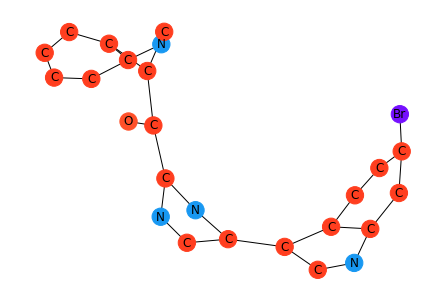

In [55]:
#displaying one sample
plt.clf()
visualize(training_set[0])

In [56]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 21270
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


## Preprocessing
> * Tokenizing the nodes(atoms)
> * With Different vocabulary size

In [57]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer

#vocabulary size
max_vocab = 400
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [58]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
# random seed
random.seed(0) 


# fun. to prepare single batch set Samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples] # Nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)   # tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post')  # pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1] #shape: (num of samples, number of nodes) 
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]  #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non-zero
    # definition for segmented_ids
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  
    
    all_nodes = np.reshape(sample_nodes, -1)  #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)         #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples]) 


#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:                 #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #randomly shuffling
        l = len(dataset)  #length of dataset
        for ndx in range(0, l, batch_size):  #loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)   #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break

In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=10):
    for k,v in train_batch[0].items(): #k: labels, v: values
        print(k)        
        print(v)
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

In [60]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

#for deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput

#GGNN, RGCN,RGAT, RGIN, GNN-Edge-MLP, GNN-FiLM
from  tf2_gnn.layers.message_passing import gnn_edge_mlp,gnn_film,rgat,rgin,rgcn,ggnn

In [61]:
#importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.math import segment_mean # to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model # layers and model
from tensorflow.keras.layers import Embedding, Dense # layers
from tensorflow.keras.optimizers import Adam # optimizer


# The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.
#Input layer for nodes (tokenized text data) , eg. [440]
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge data, eg. [257,2]
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids , eg. [440]
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["message_calculation_class"] = 'rgat'
params["hidden_dim"] = 32 #defining hidden dimension of the gnn layer
params["num_heads"] = 4
params["num_layers"] = 8
params["dense_every_num_layers"] = 8

#gnn layer with defined hyperparameters
gnn_layer = GNN(params)

#gnn output layer 
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

#building model inputs are data,edges and node2graph
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
#printing summary of the model
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_3/SegmentMean:0', description="created by layer 'tf.math.segment_mean_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None,)]            0           []        

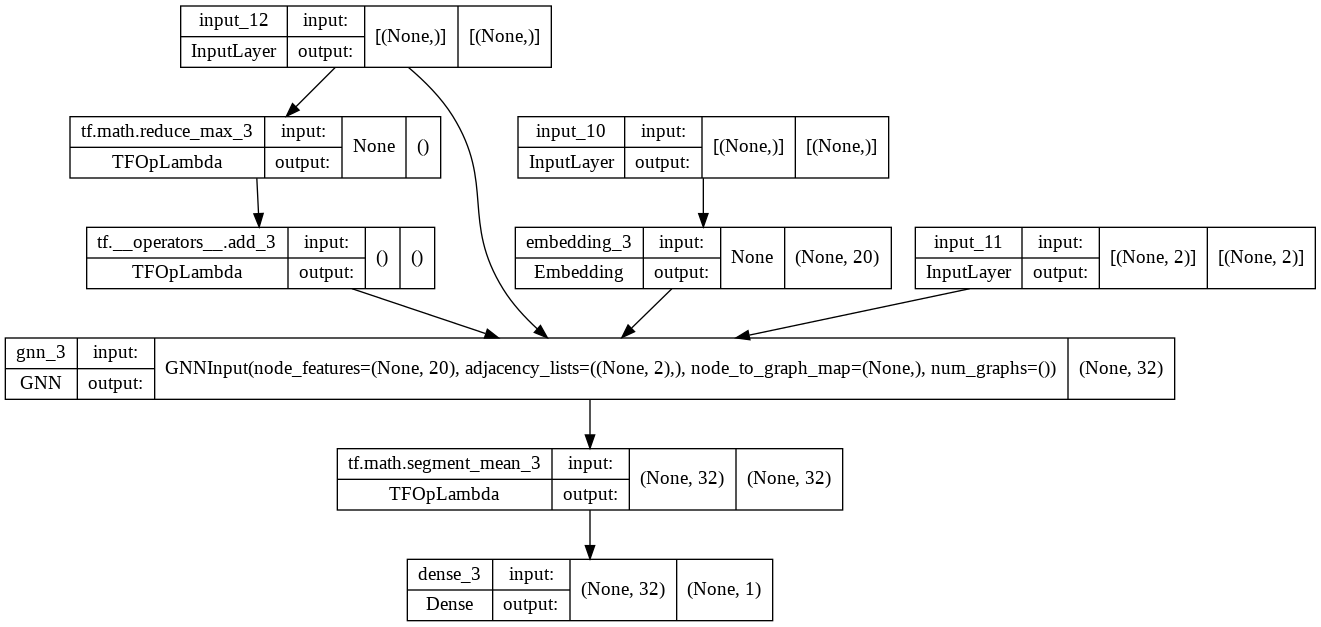

In [62]:
# This enables in-line display of the model plots in notebooks.
tf.keras.utils.plot_model(model, show_shapes=True)

In [63]:
# we will use Adam Optimizer.
model.compile(
    optimizer = 'adam',
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [64]:
%%time
import math

batch_size = 32
#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

# fit our model with 20 epocks and different batch_size.
model.fit(
    # gen_batch for training data set
    gen_batch(training_set, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batchs,
    epochs=20,
    # gen_batch for validation data set
    validation_data=gen_batch(validation_set, batch_size=32, repeat=True),
    validation_steps=num_batchs_validation,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')],
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amo

665/665 [==============================] - 57s 71ms/step - loss: 0.2531 - auc: 0.4782 - val_loss: 0.2001 - val_auc: 0.6724
Epoch 2/20
665/665 [==============================] - 45s 68ms/step - loss: 0.1910 - auc: 0.6317 - val_loss: 0.1885 - val_auc: 0.6816
Epoch 3/20
665/665 [==============================] - 45s 68ms/step - loss: 0.1835 - auc: 0.6770 - val_loss: 0.1939 - val_auc: 0.6897
Epoch 4/20
665/665 [==============================] - 46s 69ms/step - loss: 0.1805 - auc: 0.7000 - val_loss: 0.1851 - val_auc: 0.7082
Epoch 5/20
665/665 [==============================] - 46s 69ms/step - loss: 0.1797 - auc: 0.6988 - val_loss: 0.1889 - val_auc: 0.7082
Epoch 6/20
665/665 [==============================] - 46s 69ms/step - loss: 0.1776 - auc: 0.7174 - val_loss: 0.1787 - val_auc: 0.7531
Epoch 7/20
665/665 [==============================] - 46s 70ms/step - loss: 0.1757 - auc: 0.7293 - val_loss: 0.1774 - val_auc: 0.7383
Epoch 8/20
665/665 [==============================] - 46s 70ms/step - los

In [65]:
# to predict our model
y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
# to reshape y_pred
y_pred = np.reshape(y_pred, -1)
y_pred.shape

(12326,)

In [66]:
y_pred

array([0.33822247, 0.03718264, 0.00496919, ..., 0.01180712, 0.09699712,
       0.01305832], dtype=float32)

> I was expecting an AUC score of ~0.78 because it gives me that score on local , but my score on kaggle was ~0.82 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset.

> let's try another trial with another Aggregation Method

In [67]:
import pandas as pd 
# create datafram with y_pred & id columns
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
# convert the dataframe to csv file
submission.to_csv('sample_submission_trial_2.csv')

In [68]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_3 with RGCN</a>

>Knowledge graphs enable a wide variety of applications, including question answering and information retrieval. Despite the great effort invested in their creation and maintenance, even the largest (e.g., Yago, DBPedia or Wikidata)
remain incomplete. We introduce Relational Graph Convolutional Networks (R-GCNs) and apply them to two standard
knowledge base completion tasks: Link prediction (recovery
of missing facts, i.e. subject-predicate-object triples) and entity classification (recovery of missing entity attributes). R-GCNs are related to a recent class of neural networks operating on graphs, and are developed specifically to deal with the highly multi-relational data characteristic of realistic knowledge bases.

> It’s also basically an extension of the GCN of Kipf and Welling, 2017. The main difference is that Kipf and Welling, 2017 was based on operating on local neighborhoods, whereas R-GCN is meant for large-scale relational data.

> You can take a look at how the R-GCN works in the figure:

>![](https://miro.medium.com/max/1220/1*r5aN5z3FvMILRpirjQoHxQ.png)





## Read SDF format data (structured-data format)

In [69]:
#importing libraries
import numpy as np   
# IPython/Jupyter Notebook progressbar decorator for iterators.
from tqdm.notebook import tqdm 

# fun. to read sdf file, the chemical composition of a molecule is saved as (structure data file)
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file
        content = rf.read()       #reading the contents of the file
    # Split the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$') 
    
    #fun. to read each molecule configuration
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        #loop over each line
        for l in lines:           
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            # for Atom block 
            if l.startswith('    '):   
                feature = l.split()
                #node feature (atom) as O,C etc.
                node = feature[3] 
                #appending nodes    
                nodes.append(node) 
            # bond block tells about connections between atoms   
            elif l.startswith(' '):   
                # splitting line
                lnk = l.split()       
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    #appending links
                    links.append((int(lnk[0])-1, int(lnk[1])-1,))
        return nodes, np.array(links), label #return nodes, links and label
    # parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  

In [70]:
from sklearn.model_selection import train_test_split
#reading train.sdf file
training_set = read_sdf('train.sdf')
#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [71]:
#reading test file
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

## Visualizing/Inspecting a Sample

In [72]:
# libraries for displaying network of molecule
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [73]:
# fun. to visualize the compound graph atoms are given as nodes the connections are defined as edges

def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0] #atoms as nodes
    edges = sample[1] #connections as edges
    #create dictionary for labels of the nodes
    labeldict={} 
    #create array for each node color
    node_color=[] 
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i)   #adding node to the graph each node as (0,1,2..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #color coding

    # a list of nodes for each edge by adding egde to the graph from one connection to other connection
    for e in edges:
        G.add_edge(e[0], e[1])

    #drawing the graph with labels for nodes as atoms and connections as edges    
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    #returns graph
    return G

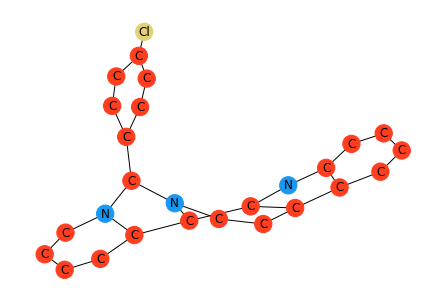

In [74]:
#displaying one sample
plt.clf()
visualize(training_set[0])

In [75]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 21270
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


## Preprocessing
> * Tokenizing the nodes(atoms)
> * With Different vocabulary size

In [76]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer

#vocabulary size
max_vocab = 400
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [77]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
# random seed
random.seed(0) 


# fun. to prepare single batch set Samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples] # Nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)   # tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post')  # pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1] #shape: (num of samples, number of nodes) 
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]  #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non-zero
    # definition for segmented_ids
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  
    
    all_nodes = np.reshape(sample_nodes, -1)  #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)         #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples]) 


#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:                 #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #randomly shuffling
        l = len(dataset)  #length of dataset
        for ndx in range(0, l, batch_size):  #loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)   #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break

In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=10):
    for k,v in train_batch[0].items(): #k: labels, v: values
        print(k)        
        print(v)
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

In [79]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

#for deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput

#GGNN, RGCN,RGAT, RGIN, GNN-Edge-MLP, GNN-FiLM
from  tf2_gnn.layers.message_passing import gnn_edge_mlp,gnn_film,rgat,rgin,rgcn,ggnn

In [80]:
#importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.math import segment_mean # to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model # layers and model
from tensorflow.keras.layers import Embedding, Dense # layers
from tensorflow.keras.optimizers import Adam # optimizer


# The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.
#Input layer for nodes (tokenized text data) , eg. [440]
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge data, eg. [257,2]
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids , eg. [440]
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["message_calculation_class"] = 'rgcn'
params["hidden_dim"] = 128 #defining hidden dimension of the gnn layer
params["num_layers"] = 8
params["dense_every_num_layers"] = 8
params["num_heads"] = 4
params["num_aggr_MLP_hidden_layers"] = 1
params["film_parameter_MLP_hidden_layers"] = 1

#gnn layer with defined hyperparameters
gnn_layer = GNN(params)

#gnn output layer 
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

#building model inputs are data,edges and node2graph
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
#printing summary of the model
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_4/StatefulPartitionedCall:0', description="created by layer 'gnn_4'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_4/SegmentMean:0', description="created by layer 'tf.math.segment_mean_4'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_4/Sigmoid:0', description="created by layer 'dense_4'")
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None,)]            0           []      

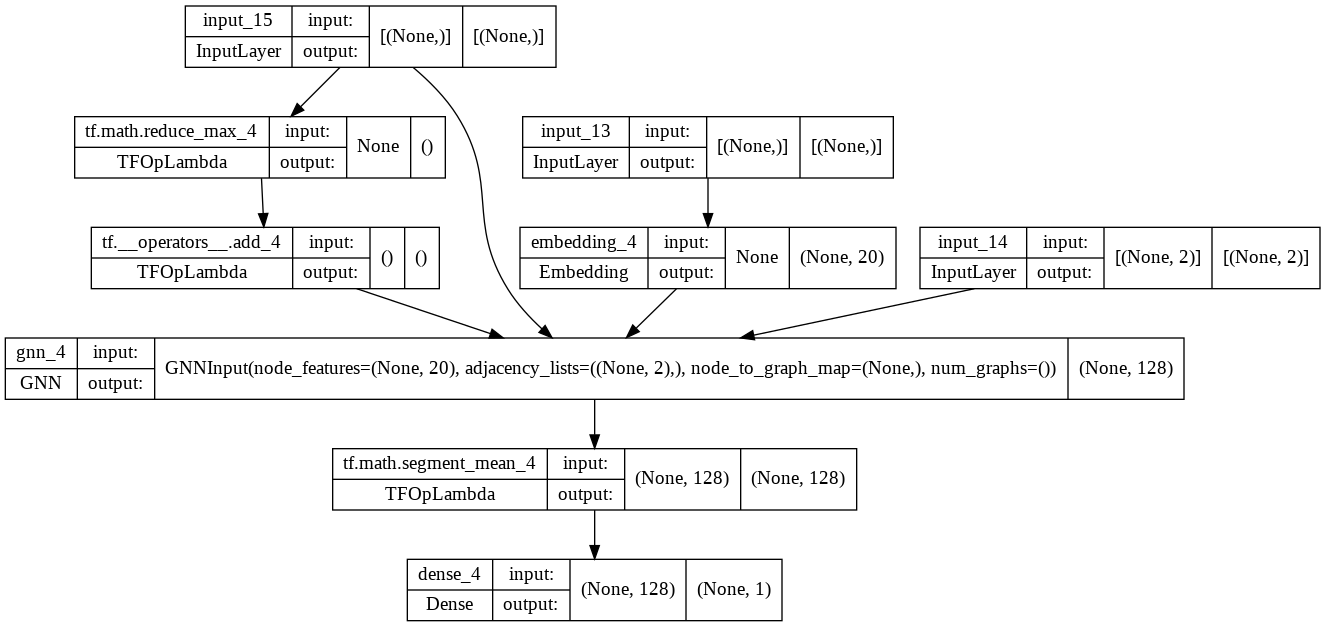

In [81]:
# This enables in-line display of the model plots in notebooks.
tf.keras.utils.plot_model(model, show_shapes=True)

In [82]:
# we will use Adam Optimizer.
model.compile(
    optimizer = 'adam',
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [83]:
%%time
import math

batch_size = 32
#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

# fit our model with 20 epocks and different batch_size.
history = model.fit(
    # gen_batch for training data set
    gen_batch(training_set, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batchs,
    epochs=20,
    # gen_batch for validation data set
    validation_data=gen_batch(validation_set, batch_size=32, repeat=True),
    validation_steps=num_batchs_validation,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')],
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgcn_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

665/665 [==============================] - 37s 46ms/step - loss: 0.2336 - auc: 0.5284 - val_loss: 0.1895 - val_auc: 0.6068
Epoch 2/20
665/665 [==============================] - 30s 46ms/step - loss: 0.1966 - auc: 0.6103 - val_loss: 0.1792 - val_auc: 0.6831
Epoch 3/20
665/665 [==============================] - 30s 46ms/step - loss: 0.1922 - auc: 0.6412 - val_loss: 0.1860 - val_auc: 0.6596
Epoch 4/20
665/665 [==============================] - 30s 46ms/step - loss: 0.1860 - auc: 0.6772 - val_loss: 0.1743 - val_auc: 0.7072
Epoch 5/20
665/665 [==============================] - 30s 45ms/step - loss: 0.1808 - auc: 0.7046 - val_loss: 0.1706 - val_auc: 0.6937
Epoch 6/20
665/665 [==============================] - 30s 45ms/step - loss: 0.1810 - auc: 0.6995 - val_loss: 0.1889 - val_auc: 0.7174
Epoch 7/20
665/665 [==============================] - 30s 45ms/step - loss: 0.1764 - auc: 0.7212 - val_loss: 0.1862 - val_auc: 0.7308
Epoch 8/20
665/665 [==============================] - 30s 45ms/step - los

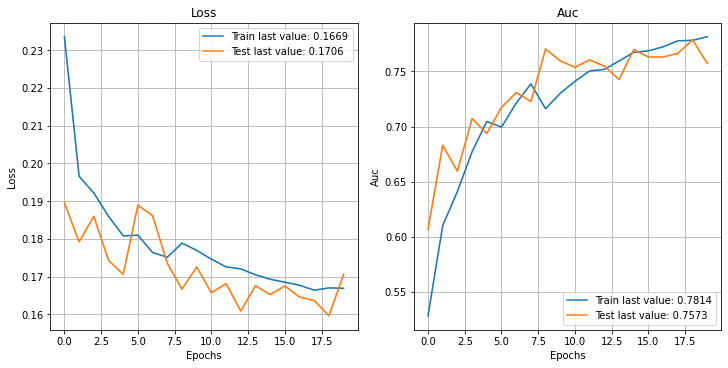

In [84]:
# just call this cell
Virt_fun(history)

In [85]:
# to predict our model
y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
# to reshape y_pred
y_pred = np.reshape(y_pred, -1)
y_pred.shape

(12326,)

In [86]:
y_pred

array([0.34693006, 0.1644293 , 0.009237  , ..., 0.01494602, 0.05358132,
       0.02620438], dtype=float32)

> I was expecting an AUC score of ~0.75 because it gives me that score on local , but my score on kaggle was ~0.79 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset as well

In [87]:
import pandas as pd 
# create datafram with y_pred & id columns
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
# convert the dataframe to csv file
submission.to_csv('sample_submission_trial_3.csv')

In [88]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_4 with RGIN</a>

> GIN is one such example among many
maximally powerful GNNs, while being simple.




## Read SDF format data (structured-data format)

In [89]:
#importing libraries
import numpy as np   
# IPython/Jupyter Notebook progressbar decorator for iterators.
from tqdm.notebook import tqdm 

# fun. to read sdf file, the chemical composition of a molecule is saved as (structure data file)
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file
        content = rf.read()       #reading the contents of the file
    # Split the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$') 
    
    #fun. to read each molecule configuration
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        #loop over each line
        for l in lines:           
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            # for Atom block 
            if l.startswith('    '):   
                feature = l.split()
                #node feature (atom) as O,C etc.
                node = feature[3] 
                #appending nodes    
                nodes.append(node) 
            # bond block tells about connections between atoms   
            elif l.startswith(' '):   
                # splitting line
                lnk = l.split()       
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    #appending links
                    links.append((int(lnk[0])-1, int(lnk[1])-1,))
        return nodes, np.array(links), label #return nodes, links and label
    # parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  

In [90]:
from sklearn.model_selection import train_test_split
#reading train.sdf file
training_set = read_sdf('train.sdf')
#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [91]:
#reading test file
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

## Visualizing/Inspecting a Sample

In [92]:
# libraries for displaying network of molecule
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [93]:
# fun. to visualize the compound graph atoms are given as nodes the connections are defined as edges

def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0] #atoms as nodes
    edges = sample[1] #connections as edges
    #create dictionary for labels of the nodes
    labeldict={} 
    #create array for each node color
    node_color=[] 
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i)   #adding node to the graph each node as (0,1,2..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #color coding

    # a list of nodes for each edge by adding egde to the graph from one connection to other connection
    for e in edges:
        G.add_edge(e[0], e[1])

    #drawing the graph with labels for nodes as atoms and connections as edges    
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    #returns graph
    return G

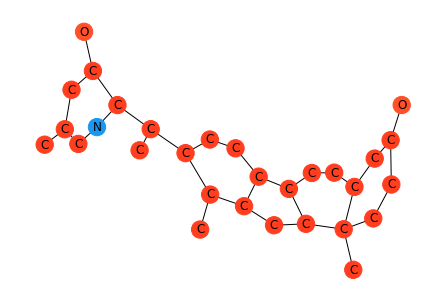

In [94]:
#displaying one sample
plt.clf()
visualize(training_set[0])

In [95]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 21270
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


## Preprocessing
> * Tokenizing the nodes(atoms)
> * With Different vocabulary size

In [96]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer

#vocabulary size
max_vocab = 400
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [97]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
# random seed
random.seed(0) 


# fun. to prepare single batch set Samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples] # Nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)   # tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post')  # pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1] #shape: (num of samples, number of nodes) 
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]  #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non-zero
    # definition for segmented_ids
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  
    
    all_nodes = np.reshape(sample_nodes, -1)  #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)         #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples]) 


#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:                 #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #randomly shuffling
        l = len(dataset)  #length of dataset
        for ndx in range(0, l, batch_size):  #loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)   #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break

In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=10):
    for k,v in train_batch[0].items(): #k: labels, v: values
        print(k)        
        print(v)
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

In [99]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

#for deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput

#GGNN, RGCN,RGAT, RGIN, GNN-Edge-MLP, GNN-FiLM
from  tf2_gnn.layers.message_passing import gnn_edge_mlp,gnn_film,rgat,rgin,rgcn,ggnn

In [100]:
#importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.math import segment_mean # to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model # layers and model
from tensorflow.keras.layers import Embedding, Dense # layers
from tensorflow.keras.optimizers import Adam # optimizer


# The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.
#Input layer for nodes (tokenized text data) , eg. [440]
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge data, eg. [257,2]
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids , eg. [440]
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["message_calculation_class"] = 'rgin'
params["hidden_dim"] = 32 #defining hidden dimension of the gnn layer
params["num_aggr_MLP_hidden_layers"] = 1

#gnn layer with defined hyperparameters
gnn_layer = GNN(params)

#gnn output layer 
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

#building model inputs are data,edges and node2graph
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
#printing summary of the model
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_5/SegmentMean:0', description="created by layer 'tf.math.segment_mean_5'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None,)]            0           []        

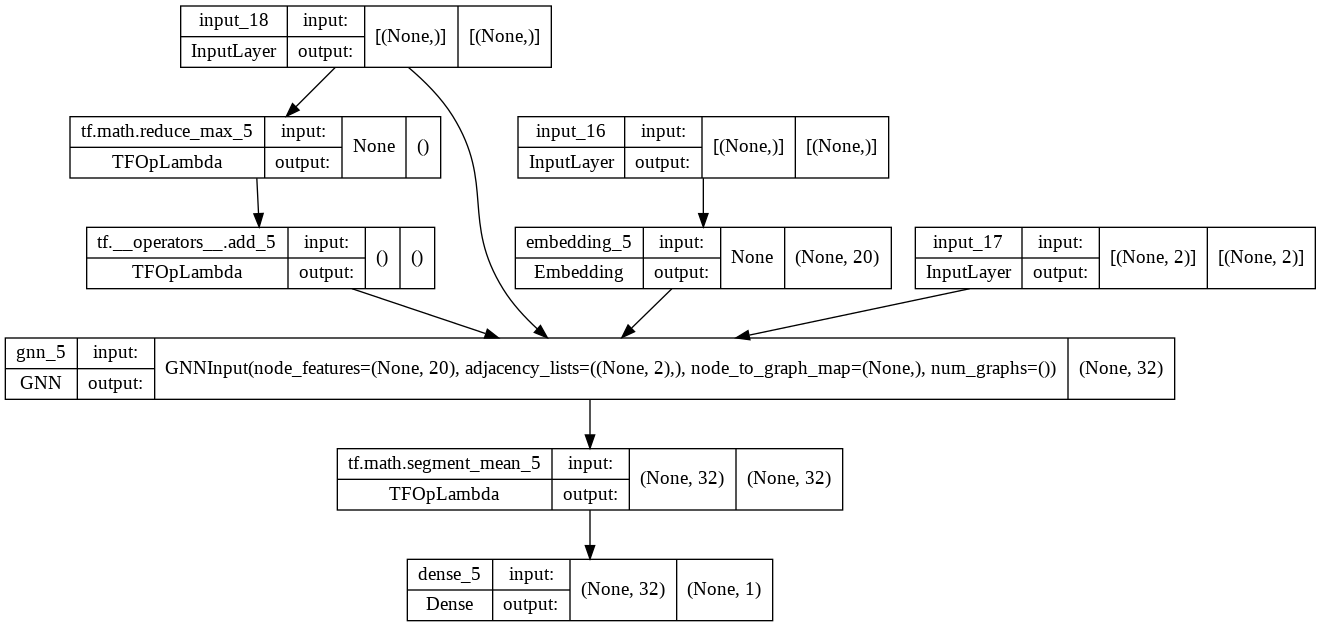

In [101]:
# This enables in-line display of the model plots in notebooks.
tf.keras.utils.plot_model(model, show_shapes=True)

In [102]:
# we will use Adam Optimizer.
model.compile(
    optimizer = 'adam',
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [103]:
%%time
import math

batch_size = 32
#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

# fit our model with 20 epocks and different batch_size.
history = model.fit(
    # gen_batch for training data set
    gen_batch(training_set, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batchs,
    epochs=20,
    # gen_batch for validation data set
    validation_data=gen_batch(validation_set, batch_size=32, repeat=True),
    validation_steps=num_batchs_validation,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')],
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgin_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgin_2/embedding_lookup_grad/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/rgin_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor

665/665 [==============================] - 17s 22ms/step - loss: 0.2363 - auc: 0.5453 - val_loss: 0.1762 - val_auc: 0.6964
Epoch 2/20
665/665 [==============================] - 14s 21ms/step - loss: 0.1951 - auc: 0.6090 - val_loss: 0.1737 - val_auc: 0.6984
Epoch 3/20
665/665 [==============================] - 14s 21ms/step - loss: 0.1892 - auc: 0.6431 - val_loss: 0.1682 - val_auc: 0.7318
Epoch 4/20
665/665 [==============================] - 14s 21ms/step - loss: 0.1878 - auc: 0.6560 - val_loss: 0.1717 - val_auc: 0.7181
Epoch 5/20
665/665 [==============================] - 14s 21ms/step - loss: 0.1876 - auc: 0.6468 - val_loss: 0.1767 - val_auc: 0.7140
Epoch 6/20
665/665 [==============================] - 14s 21ms/step - loss: 0.1870 - auc: 0.6539 - val_loss: 0.1721 - val_auc: 0.7046
Epoch 7/20
665/665 [==============================] - 14s 21ms/step - loss: 0.1851 - auc: 0.6700 - val_loss: 0.1885 - val_auc: 0.7372
Epoch 8/20
665/665 [==============================] - 14s 21ms/step - los

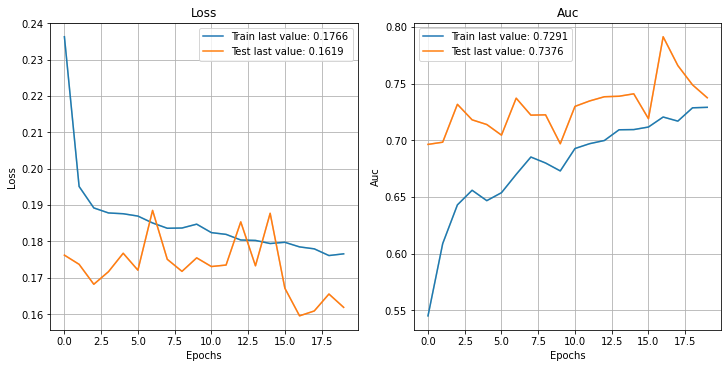

In [104]:
# just call this cell
Virt_fun(history)

In [105]:
# to predict our model
y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
# to reshape y_pred
y_pred = np.reshape(y_pred, -1)
y_pred.shape

(12326,)

In [106]:
y_pred

array([0.2398697 , 0.07979161, 0.01756998, ..., 0.02833702, 0.08035626,
       0.02313717], dtype=float32)

> I was expecting an AUC score of ~0.73 because it gives me that score on local , but my score on kaggle was ~0.72 this was bad .

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was bad to reach this score , because the model suffering from the overfitting and the unbalanced dataset.

> Let's try one more trial with this Data preprocessing, before we start doing the upsampling.

In [107]:
import pandas as pd 
# create datafram with y_pred & id columns
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
# convert the dataframe to csv file
submission.to_csv('sample_submission_trial_4.csv')

In [108]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_5 with GNN_Edge_MLP</a>

> Graph Neural Network with Edge MLPs - a variant of RGCN in which messages on edges are computed using full MLPs, not just a single layer applied to the source state.




## Read SDF format data (structured-data format)

In [109]:
#importing libraries
import numpy as np   
# IPython/Jupyter Notebook progressbar decorator for iterators.
from tqdm.notebook import tqdm 

# fun. to read sdf file, the chemical composition of a molecule is saved as (structure data file)
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file
        content = rf.read()       #reading the contents of the file
    # Split the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$') 
    
    #fun. to read each molecule configuration
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        #loop over each line
        for l in lines:           
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            # for Atom block 
            if l.startswith('    '):   
                feature = l.split()
                #node feature (atom) as O,C etc.
                node = feature[3] 
                #appending nodes    
                nodes.append(node) 
            # bond block tells about connections between atoms   
            elif l.startswith(' '):   
                # splitting line
                lnk = l.split()       
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    #appending links
                    links.append((int(lnk[0])-1, int(lnk[1])-1,))
        return nodes, np.array(links), label #return nodes, links and label
    # parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  

In [110]:
from sklearn.model_selection import train_test_split
#reading train.sdf file
training_set = read_sdf('train.sdf')
#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [111]:
#reading test file
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

## Visualizing/Inspecting a Sample

In [112]:
# libraries for displaying network of molecule
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [113]:
# fun. to visualize the compound graph atoms are given as nodes the connections are defined as edges

def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0] #atoms as nodes
    edges = sample[1] #connections as edges
    #create dictionary for labels of the nodes
    labeldict={} 
    #create array for each node color
    node_color=[] 
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i)   #adding node to the graph each node as (0,1,2..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #color coding

    # a list of nodes for each edge by adding egde to the graph from one connection to other connection
    for e in edges:
        G.add_edge(e[0], e[1])

    #drawing the graph with labels for nodes as atoms and connections as edges    
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    #returns graph
    return G

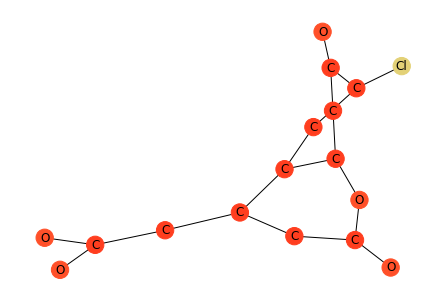

In [114]:
#displaying one sample
plt.clf()
visualize(training_set[0])

In [115]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 21270
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


## Preprocessing
> * Tokenizing the nodes(atoms)
> * With Different vocabulary size

In [116]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer

#vocabulary size
max_vocab = 400
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [117]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
# random seed
random.seed(0) 


# fun. to prepare single batch set Samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples] # Nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)   # tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post')  # pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1] #shape: (num of samples, number of nodes) 
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]  #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non-zero
    # definition for segmented_ids
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  
    
    all_nodes = np.reshape(sample_nodes, -1)  #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)         #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples]) 


#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:                 #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #randomly shuffling
        l = len(dataset)  #length of dataset
        for ndx in range(0, l, batch_size):  #loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)   #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break

In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=10):
    for k,v in train_batch[0].items(): #k: labels, v: values
        print(k)        
        print(v)
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

In [119]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

#for deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput

#GGNN, RGCN,RGAT, RGIN, GNN-Edge-MLP, GNN-FiLM
from  tf2_gnn.layers.message_passing import gnn_edge_mlp,gnn_film,rgat,rgin,rgcn,ggnn

In [120]:
#importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.math import segment_mean # to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model # layers and model
from tensorflow.keras.layers import Embedding, Dense # layers
from tensorflow.keras.optimizers import Adam # optimizer


# The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.
#Input layer for nodes (tokenized text data) , eg. [440]
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge data, eg. [257,2]
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids , eg. [440]
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["message_calculation_class"] = 'GNN_Edge_MLP'
params["hidden_dim"] = 32 #defining hidden dimension of the gnn layer


#gnn layer with defined hyperparameters
gnn_layer = GNN(params)

#gnn output layer 
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

#building model inputs are data,edges and node2graph
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
#printing summary of the model
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_6/StatefulPartitionedCall:0', description="created by layer 'gnn_6'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_6/SegmentMean:0', description="created by layer 'tf.math.segment_mean_6'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_6/Sigmoid:0', description="created by layer 'dense_6'")
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_19 (InputLayer)          [(None,)]            0           []        

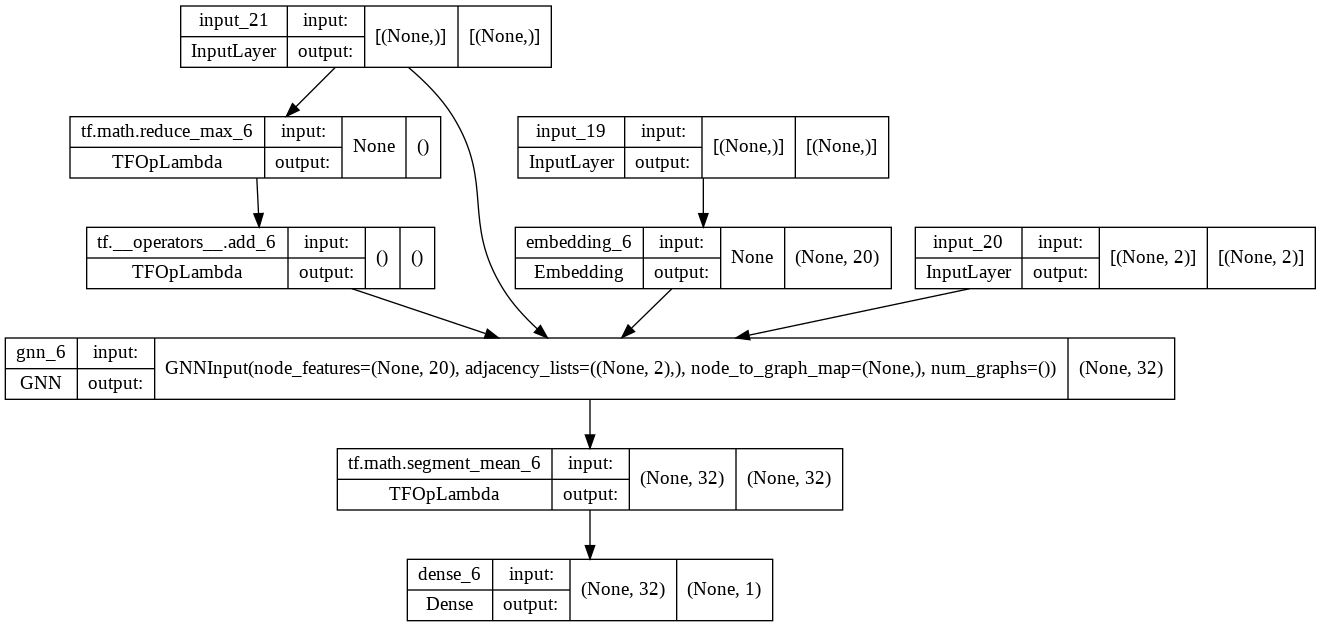

In [121]:
# This enables in-line display of the model plots in notebooks.
tf.keras.utils.plot_model(model, show_shapes=True)

In [122]:
# we will use Adam Optimizer.
model.compile(
    optimizer = 'adam',
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [123]:
%%time
import math

batch_size = 32
#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

# fit our model with 20 epocks and different batch_size.
history=model.fit(
    # gen_batch for training data set
    gen_batch(training_set, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batchs,
    epochs=20,
    # gen_batch for validation data set
    validation_data=gen_batch(validation_set, batch_size=32, repeat=True),
    validation_steps=num_batchs_validation,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')],
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/gnn__edge_mlp_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/gnn__edge_mlp_2/embedding_lookup_grad/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/gnn__edge_mlp_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype

665/665 [==============================] - 15s 19ms/step - loss: 0.2543 - auc: 0.4756 - val_loss: 0.2081 - val_auc: 0.6341
Epoch 2/20
665/665 [==============================] - 12s 18ms/step - loss: 0.1902 - auc: 0.6141 - val_loss: 0.2082 - val_auc: 0.6779
Epoch 3/20
665/665 [==============================] - 12s 19ms/step - loss: 0.1839 - auc: 0.6660 - val_loss: 0.1914 - val_auc: 0.6903
Epoch 4/20
665/665 [==============================] - 12s 19ms/step - loss: 0.1831 - auc: 0.6707 - val_loss: 0.1904 - val_auc: 0.6787
Epoch 5/20
665/665 [==============================] - 12s 19ms/step - loss: 0.1809 - auc: 0.6880 - val_loss: 0.1851 - val_auc: 0.7030
Epoch 6/20
665/665 [==============================] - 13s 19ms/step - loss: 0.1796 - auc: 0.6965 - val_loss: 0.1948 - val_auc: 0.6971
Epoch 7/20
665/665 [==============================] - 12s 18ms/step - loss: 0.1798 - auc: 0.6952 - val_loss: 0.1853 - val_auc: 0.7060
Epoch 8/20
665/665 [==============================] - 12s 19ms/step - los

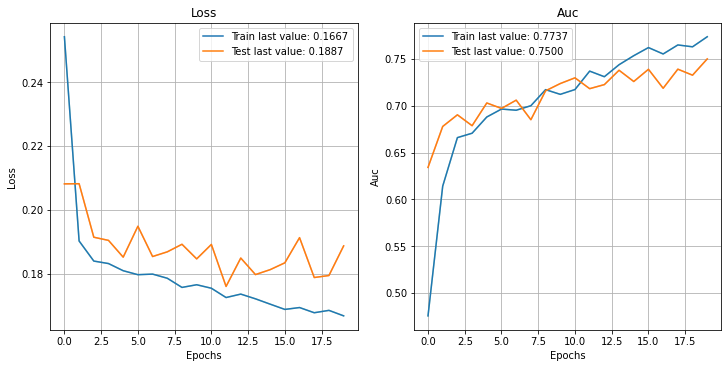

In [124]:
# just call this cell
Virt_fun(history)

In [125]:
# to predict our model
y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
# to reshape y_pred
y_pred = np.reshape(y_pred, -1)
y_pred.shape

(12326,)

In [126]:
y_pred

array([0.27674946, 0.25333682, 0.04485575, ..., 0.02523443, 0.07596479,
       0.0480867 ], dtype=float32)

> I was expecting an AUC score of ~0.75 because it gives me that score on local , but my score on kaggle was ~0.76 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well.

> Let's try another preprocessing

In [127]:
import pandas as pd 
# create datafram with y_pred & id columns
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
# convert the dataframe to csv file
submission.to_csv('sample_submission_trial_5.csv')

In [128]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_5.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a> Data Preprocessing trial 2 with Upsampling.</a>

> Resample dataset to have balanced classes

## Read SDF format data (structured-data format)

In [ ]:
#importing libraries
import numpy as np   
# IPython/Jupyter Notebook progressbar decorator for iterators.
from tqdm.notebook import tqdm 

# fun. to read sdf file, the chemical composition of a molecule is saved as (structure data file)
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file
        content = rf.read()       #reading the contents of the file
    # Split the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$') 
    
    #fun. to read each molecule configuration
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        #loop over each line
        for l in lines:           
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            # for Atom block 
            if l.startswith('    '):   
                feature = l.split()
                #node feature (atom) as O,C etc.
                node = feature[3] 
                #appending nodes    
                nodes.append(node) 
            # bond block tells about connections between atoms   
            elif l.startswith(' '):   
                # splitting line
                lnk = l.split()       
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    #appending links
                    links.append((int(lnk[0])-1, int(lnk[1])-1,))
        return nodes, np.array(links), label #return nodes, links and label
    # parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  

In [ ]:
from sklearn.model_selection import train_test_split
#reading train.sdf file
training_set = read_sdf('train.sdf')

  0%|          | 0/25024 [00:00<?, ?it/s]

In [ ]:
#reading test file
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

> Split the data into random train and test subsets.

> Note : Because we don't know if test data will be balanced or not , the oversample only on training dataset.

> If we balance the validation set our model may work well (may get better score in Val) but in the future after deploying, it may not work better so while training, validate with imbalance data only.

In [ ]:
#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

Imbalanced data

In [ ]:
np.unique(np.array(training_set)[:,2],return_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(array([0, 1], dtype=object), array([20243,  1027]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


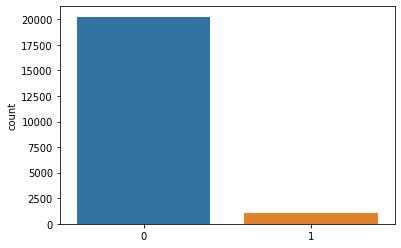

In [ ]:
#"sns" is the standard alias.
import seaborn as sns
sns.countplot(np.array(training_set)[:,2])

In [ ]:
import pandas as pd

In [ ]:
X_train = pd.DataFrame(np.array(training_set)[:,:-1])
y_train = pd.DataFrame(np.array(training_set)[:,2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
from sklearn.utils import resample
def resamplingDataPrep(X_train, y_train, target_var): 
    
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = y_train.values
    
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    
    # sample with replacement to match majority class reproducible results
    minority_class_after = resample(minority_class, replace=True,n_samples=20237,random_state=42)
    print('minority_class_after: '+ str(len(minority_class_after)))
    return majority_class, minority_class_after

# call resamplingDataPrep fun.
z1,z2 = resamplingDataPrep(X_train,y_train,2)

majority_class: 20243
minority_class: 1027
minority_class_after: 20237


In [ ]:
# To make sure everything is alright
z1

,0,1,2
0,"[O, O, O, O, O, O, N, N, C, C, C, C, C, C, C, ...","[[0, 9], [1, 12], [1, 14], [2, 11], [2, 17], [...",0
1,"[O, O, O, O, O, O, O, O, O, O, O, C, C, C, C, ...","[[0, 14], [0, 15], [1, 11], [1, 17], [2, 12], ...",0
2,"[O, O, N, N, N, C, C, C, C, C, C, C, C, C, C, ...","[[0, 2], [1, 3], [2, 6], [3, 5], [4, 11], [4, ...",0
3,"[S, O, O, O, N, N, C, C, C, C, C, C, C, C, C, ...","[[0, 8], [0, 12], [1, 7], [2, 9], [3, 10], [4,...",0
4,"[O, O, O, N, N, C, C, C, C, C, C, C, C, C, C, ...","[[0, 3], [1, 13], [2, 16], [3, 4], [3, 5], [4,...",0
...,...,...,...
21265,"[S, O, O, O, O, N, N, C, C, C, C, C, C, C, C, ...","[[0, 1], [0, 2], [0, 5], [0, 6], [3, 7], [4, 8...",0
21266,"[S, O, N, N, C, C, C, C, C, C, C, C, C, C, C]","[[0, 6], [1, 5], [2, 4], [2, 6], [3, 5], [3, 6...",0
21267,"[O, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","[[0, 2], [1, 2], [1, 5], [1, 6], [1, 7], [2, 3...",0
21268,"[Cl, O, O, N, C, C, C, C, C, C, C, C, C, C, C,...","[[0, 12], [1, 7], [2, 3], [3, 4], [3, 6], [4, ...",0


In [ ]:
# To make sure everything is alright
z2

,0,1,2
18078,"[S, O, O, O, O, O, N, C, C, C, C, C, C, C, C, ...","[[0, 21], [0, 28], [1, 9], [1, 24], [2, 12], [...",1
2283,"[S, S, O, O, O, O, O, O, N, N, N, N, N, N, C, ...","[[0, 36], [1, 37], [2, 18], [3, 19], [4, 22], ...",1
9725,"[F, F, F, F, F, F, O, O, O, O, O, N, N, N, N, ...","[[0, 16], [1, 16], [2, 16], [3, 17], [4, 17], ...",1
6718,"[O, N, N, C, C, C, C, C, C, C, C, C, C, C, C, ...","[[0, 15], [0, 21], [1, 4], [1, 9], [2, 12], [2...",1
1723,"[O, O, O, O, O, O, O, O, C, C, C, C, C, C, C, ...","[[0, 18], [1, 19], [2, 20], [3, 21], [4, 22], ...",1
...,...,...,...
10671,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[[0, 25], [0, 43], [26, 1], [1, 40], [2, 29], ...",1
7702,"[O, O, O, O, O, O, O, O, O, C, C, C, C, C, C, ...","[[0, 12], [0, 16], [1, 14], [1, 16], [2, 15], ...",1
10127,"[O, O, O, O, O, O, O, O, C, C, C, C, C, C, C, ...","[[0, 9], [0, 13], [1, 20], [1, 24], [2, 12], [...",1
9443,"[O, O, O, O, O, O, O, O, O, O, N, N, N, N, N, ...","[[0, 18], [1, 17], [2, 29], [2, 34], [3, 20], ...",1


In [ ]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([z1, z2])

In [ ]:
# Display new class counts
df_upsampled[2].value_counts()

0    20243
1    20237
Name: 2, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


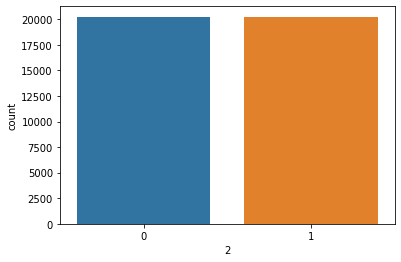

In [ ]:
# To make sure everything is alright.
sns.countplot(df_upsampled[2])

In [ ]:
# convert our dataFrame to list
training_set = df_upsampled.values.tolist()

## Visualizing/Inspecting a Sample

In [ ]:
# libraries for displaying network of molecule
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [ ]:
# fun. to visualize the compound graph atoms are given as nodes the connections are defined as edges

def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0] #atoms as nodes
    edges = sample[1] #connections as edges
    #create dictionary for labels of the nodes
    labeldict={} 
    #create array for each node color
    node_color=[] 
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i)   #adding node to the graph each node as (0,1,2..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #color coding

    # a list of nodes for each edge by adding egde to the graph from one connection to other connection
    for e in edges:
        G.add_edge(e[0], e[1])

    #drawing the graph with labels for nodes as atoms and connections as edges    
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    #returns graph
    return G

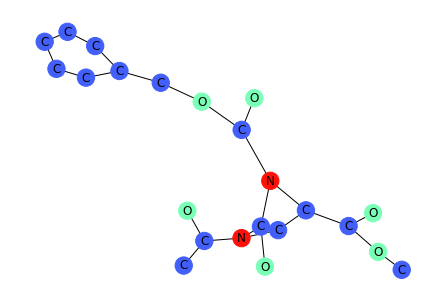

In [ ]:
#displaying one sample
plt.clf()
visualize(training_set[0])

In [ ]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 40480
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


## Preprocessing
> * Tokenizing the nodes(atoms)
> * With Different vocabulary size

In [ ]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer

#vocabulary size
max_vocab = 400
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [ ]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
# random seed
random.seed(0) 


# fun. to prepare single batch set Samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples] # Nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)   # tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post')  # pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1] #shape: (num of samples, number of nodes) 
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]  #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non-zero
    # definition for segmented_ids
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  
    
    all_nodes = np.reshape(sample_nodes, -1)  #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)         #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples]) 


#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:                 #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #randomly shuffling
        l = len(dataset)  #length of dataset
        for ndx in range(0, l, batch_size):  #loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)   #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break

In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=10):
    for k,v in train_batch[0].items(): #k: labels, v: values
        print(k)        
        print(v)
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

In [ ]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

#for deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput

     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 73 kB 1.8 MB/s 
     |████████████████████████████████| 1.2 MB 32.8 MB/s 
     |████████████████████████████████| 346 kB 50.8 MB/s 
     |████████████████████████████████| 134 kB 54.0 MB/s 
     |████████████████████████████████| 462 kB 48.5 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 3.6 MB 36.1 MB/s 
     |████████████████████████████████| 178 kB 55.8 MB/s 
     |████████████████████████████████| 85 kB 4.3 MB/s 
     |████████████████████████████████| 41 kB 576 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [ ]:
#importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.math import segment_mean # to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model # layers and model
from tensorflow.keras.layers import Embedding, Dense # layers
from tensorflow.keras.optimizers import Adam # optimizer


In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

def trainfun(model_name,trial_no):
  # The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.
  #Input layer for nodes (tokenized text data) , eg. [440]
  data = keras.Input(batch_shape=(None,))

  # the first dim is different to the previous one. it is the total number of edges in this batch
  edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge data, eg. [257,2]
  node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids , eg. [440]
  embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

  # number of graphs (number of samples)
  num_graph = tf.reduce_max(node2graph)+1

  #gnn_input layer with inputs as defined above
  gnn_input = GNNInput(
      node_features=embeded,
      adjacency_lists=(edge,),
      node_to_graph_map=node2graph, 
      num_graphs=num_graph,
  )

  # https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
  params = GNN.get_default_hyperparameters()
  params["message_calculation_class"] = model_name
  params["hidden_dim"] = 128 #defining hidden dimension of the gnn layer
  params["num_layers"] = 8
  params["dense_every_num_layers"] = 8
  params["num_heads"] = 4
  params["num_aggr_MLP_hidden_layers"] = 1
  params["film_parameter_MLP_hidden_layers"] = 1

  #gnn layer with defined hyperparameters
  gnn_layer = GNN(params)

  #gnn output layer 
  gnn_out = gnn_layer(gnn_input)

  print('gnn_out', gnn_out)

  # https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
  avg = segment_mean(
      data=gnn_out,
      segment_ids=node2graph
  )
  print('mean:', avg)

  #final dense layer with sigmoid
  pred = Dense(1, activation='sigmoid')(avg)# binary classification: Dense(2), but here we only output 1 probability
  print('pred:', pred)

  #building model inputs are data,edges and node2graph
  #output: prediction value from dense layer
  model = Model(inputs={'data': data,'edges': edge,'node2grah': node2graph,},outputs=pred)

  # we will use Adam Optimizer.
  model.compile(optimizer = 'adam', loss='BinaryCrossentropy', metrics=['AUC'])

  import math

  batch_size = 32
  #math.ceil: returns the smallest integral value greater than the number
  num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
  num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

  # fit our model with 20 epocks and different batch_size.
  history = model.fit(
      # gen_batch for training data set
      gen_batch(training_set, batch_size=batch_size, repeat=True),
      steps_per_epoch=num_batchs,
      epochs=15,
      # gen_batch for validation data set
      validation_data=gen_batch(validation_set, batch_size=batch_size, repeat=True),
      validation_steps=num_batchs_validation,
      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')],)
  
  # show the history of our model
  show_history(history)
  plot_history(history, path="standard.png")
  plt.close()


  # to predict our model
  y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
  # to reshape y_pred
  y_pred = np.reshape(y_pred, -1)
  print(y_pred)

  import pandas as pd 
  # create datafram with y_pred & id columns
  submission = pd.DataFrame({'label':y_pred})
  submission.index.name = 'id'
  # convert the dataframe to csv file
  submission.to_csv('sample_submission_trial_'+trial_no+'.csv')


# <a>Trial_6 with GGNN</a>





gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_7/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tens

1265/1265 [==============================] - 101s 63ms/step - loss: 0.6296 - auc: 0.7003 - val_loss: 1.0779 - val_auc: 0.7369
Epoch 2/15
1265/1265 [==============================] - 76s 60ms/step - loss: 0.5770 - auc: 0.7682 - val_loss: 0.5665 - val_auc: 0.7618
Epoch 3/15
1265/1265 [==============================] - 76s 60ms/step - loss: 0.5184 - auc: 0.8228 - val_loss: 0.5080 - val_auc: 0.7736
Epoch 4/15
1265/1265 [==============================] - 76s 60ms/step - loss: 0.4645 - auc: 0.8618 - val_loss: 0.6923 - val_auc: 0.8048
Epoch 5/15
1265/1265 [==============================] - 77s 61ms/step - loss: 0.3989 - auc: 0.9009 - val_loss: 0.5071 - val_auc: 0.8181
Epoch 6/15
1265/1265 [==============================] - 76s 60ms/step - loss: 0.3891 - auc: 0.9060 - val_loss: 0.4581 - val_auc: 0.7986
Epoch 7/15
1265/1265 [==============================] - 76s 60ms/step - loss: 0.4024 - auc: 0.8994 - val_loss: 0.4847 - val_auc: 0.8281
Epoch 8/15
1265/1265 [==============================] - 77

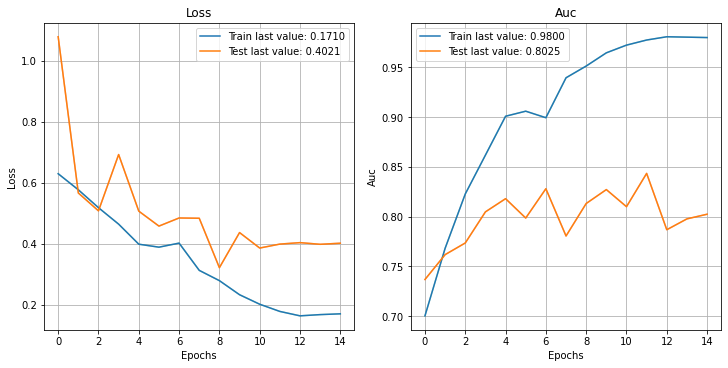

[8.9184391e-01 9.0730127e-06 1.6565323e-06 ... 3.7898357e-05 6.9294392e-09
 9.8208839e-01]
CPU times: user 19min 10s, sys: 1min 12s, total: 20min 22s
Wall time: 19min 55s


In [ ]:
%%time
# just run this cell
trainfun('GGNN','6')

> I was expecting an AUC score of ~0.80 because it gives me that score on local , but my score on kaggle was ~0.84 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well.

In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_6.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_7 with RGAT</a>





gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amo

1265/1265 [==============================] - 124s 87ms/step - loss: 0.6246 - auc: 0.7072 - val_loss: 0.4871 - val_auc: 0.7290
Epoch 2/15
1265/1265 [==============================] - 97s 77ms/step - loss: 0.5633 - auc: 0.7800 - val_loss: 0.5312 - val_auc: 0.7546
Epoch 3/15
1265/1265 [==============================] - 98s 77ms/step - loss: 0.5355 - auc: 0.8070 - val_loss: 0.6129 - val_auc: 0.7673
Epoch 4/15
1265/1265 [==============================] - 101s 80ms/step - loss: 0.5236 - auc: 0.8158 - val_loss: 0.6002 - val_auc: 0.7752
Epoch 5/15
1265/1265 [==============================] - 98s 77ms/step - loss: 0.4938 - auc: 0.8392 - val_loss: 0.5868 - val_auc: 0.7814
Epoch 6/15
1265/1265 [==============================] - 100s 79ms/step - loss: 0.4661 - auc: 0.8583 - val_loss: 0.6249 - val_auc: 0.8038
Epoch 7/15
1265/1265 [==============================] - 99s 78ms/step - loss: 0.4343 - auc: 0.8790 - val_loss: 0.5581 - val_auc: 0.7916
Epoch 8/15
1265/1265 [==============================] - 

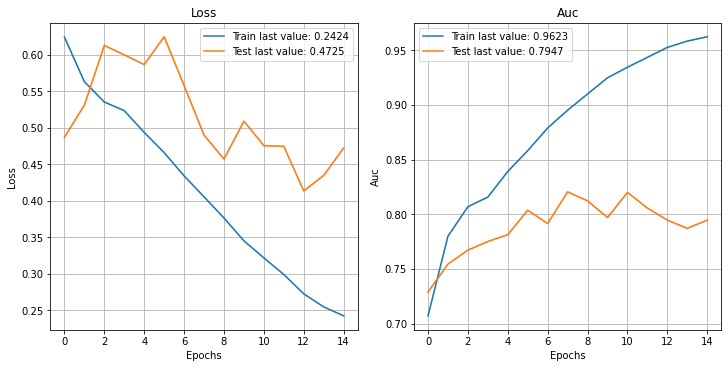

[8.0587256e-01 9.8179138e-05 3.5502413e-05 ... 4.5824872e-05 9.3820505e-03
 9.0655947e-01]
CPU times: user 28min 41s, sys: 2min 46s, total: 31min 28s
Wall time: 25min 52s


In [ ]:
%%time
# just run this cell
trainfun('rgat','7')

> I was expecting an AUC score of ~0.79 because it gives me that score on local , but my score on kaggle was ~0.85 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well

> Let's try another Aggregation method.

In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_7.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_8 with RGCN</a>





gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_3/SegmentMean:0', description="created by layer 'tf.math.segment_mean_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgcn_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

1265/1265 [==============================] - 60s 42ms/step - loss: 0.6307 - auc: 0.6962 - val_loss: 0.7181 - val_auc: 0.7299
Epoch 2/15
1265/1265 [==============================] - 49s 39ms/step - loss: 0.5835 - auc: 0.7580 - val_loss: 0.7969 - val_auc: 0.7402
Epoch 3/15
1265/1265 [==============================] - 48s 38ms/step - loss: 0.5487 - auc: 0.7956 - val_loss: 0.6972 - val_auc: 0.7758
Epoch 4/15
1265/1265 [==============================] - 49s 38ms/step - loss: 0.5232 - auc: 0.8175 - val_loss: 0.6985 - val_auc: 0.7469
Epoch 5/15
1265/1265 [==============================] - 48s 38ms/step - loss: 0.4975 - auc: 0.8374 - val_loss: 0.4394 - val_auc: 0.7617
Epoch 6/15
1265/1265 [==============================] - 48s 38ms/step - loss: 0.4747 - auc: 0.8537 - val_loss: 0.5994 - val_auc: 0.7684
Epoch 7/15
1265/1265 [==============================] - 48s 38ms/step - loss: 0.4478 - auc: 0.8713 - val_loss: 0.5318 - val_auc: 0.7966
Epoch 8/15
1265/1265 [==============================] - 48s

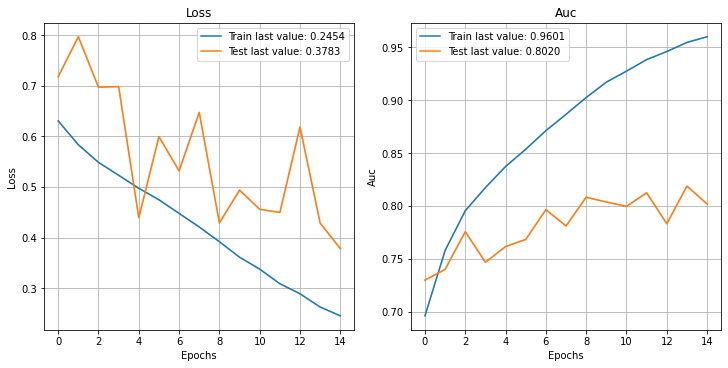

[7.3148251e-01 7.2539001e-07 4.3573522e-07 ... 7.4775126e-03 9.7800958e-01
 9.7055209e-01]
CPU times: user 13min 23s, sys: 1min 9s, total: 14min 32s
Wall time: 12min 39s


In [ ]:
%%time
# just run this cell
trainfun('rgcn','8')

> I was expecting an AUC score of ~0.80 because it gives me that score on local , but my score on kaggle was ~0.86 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well.

> Let's try another Aggregation Method

In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_8.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_9 with RGIN</a>





gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_4/StatefulPartitionedCall:0', description="created by layer 'gnn_4'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_4/SegmentMean:0', description="created by layer 'tf.math.segment_mean_4'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_4/Sigmoid:0', description="created by layer 'dense_4'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgin_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

1265/1265 [==============================] - 61s 44ms/step - loss: 0.6610 - auc: 0.6509 - val_loss: 0.6870 - val_auc: 0.7199
Epoch 2/15
1265/1265 [==============================] - 54s 43ms/step - loss: 0.6273 - auc: 0.7072 - val_loss: 0.6952 - val_auc: 0.7056
Epoch 3/15
1265/1265 [==============================] - 55s 44ms/step - loss: 0.6074 - auc: 0.7327 - val_loss: 0.7945 - val_auc: 0.7442
Epoch 4/15
1265/1265 [==============================] - 56s 44ms/step - loss: 0.5970 - auc: 0.7443 - val_loss: 0.6722 - val_auc: 0.7398
Epoch 5/15
1265/1265 [==============================] - 55s 43ms/step - loss: 0.5926 - auc: 0.7489 - val_loss: 0.7669 - val_auc: 0.7320
Epoch 6/15
1265/1265 [==============================] - 55s 43ms/step - loss: 0.5961 - auc: 0.7437 - val_loss: 0.6395 - val_auc: 0.7395
Epoch 7/15
1265/1265 [==============================] - 55s 43ms/step - loss: 0.5869 - auc: 0.7538 - val_loss: 0.5493 - val_auc: 0.7302
Epoch 8/15
1265/1265 [==============================] - 55s

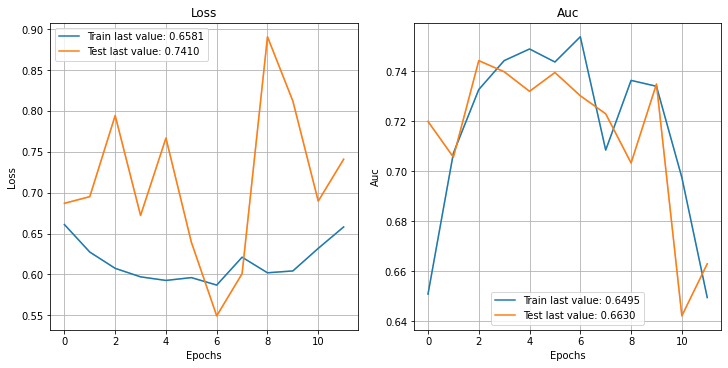

[0.61315817 0.4463086  0.1003132  ... 0.11814643 0.6585053  0.1905363 ]
CPU times: user 12min 24s, sys: 55.9 s, total: 13min 20s
Wall time: 11min 38s


In [ ]:
%%time
# just run this cell
trainfun('rgin','9')

> I was expecting an AUC score of ~0.60 because it gives me that score on local , but my score on kaggle was ~0.58 that was bad.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model wasn't good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well.

> Let's try one more trial.

In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_9.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_10 with GNN_Edge_MLP</a>





gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_5/SegmentMean:0', description="created by layer 'tf.math.segment_mean_5'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/gnn__edge_mlp_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/gnn__edge_mlp_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/gnn__edge_mlp_6/embedding_lookup_grad/Cast:0", shape=(2,), dty

1265/1265 [==============================] - 54s 38ms/step - loss: 0.6284 - auc: 0.7006 - val_loss: 0.6869 - val_auc: 0.7217
Epoch 2/15
1265/1265 [==============================] - 47s 38ms/step - loss: 0.5746 - auc: 0.7687 - val_loss: 0.7619 - val_auc: 0.7382
Epoch 3/15
1265/1265 [==============================] - 47s 37ms/step - loss: 0.5540 - auc: 0.7905 - val_loss: 0.6626 - val_auc: 0.7490
Epoch 4/15
1265/1265 [==============================] - 47s 37ms/step - loss: 0.5403 - auc: 0.8031 - val_loss: 0.6070 - val_auc: 0.7401
Epoch 5/15
1265/1265 [==============================] - 47s 37ms/step - loss: 0.5267 - auc: 0.8152 - val_loss: 0.5947 - val_auc: 0.7904
Epoch 6/15
1265/1265 [==============================] - 47s 38ms/step - loss: 0.4746 - auc: 0.8547 - val_loss: 0.5052 - val_auc: 0.7795
Epoch 7/15
1265/1265 [==============================] - 47s 37ms/step - loss: 0.4360 - auc: 0.8793 - val_loss: 0.5586 - val_auc: 0.7857
Epoch 8/15
1265/1265 [==============================] - 47s

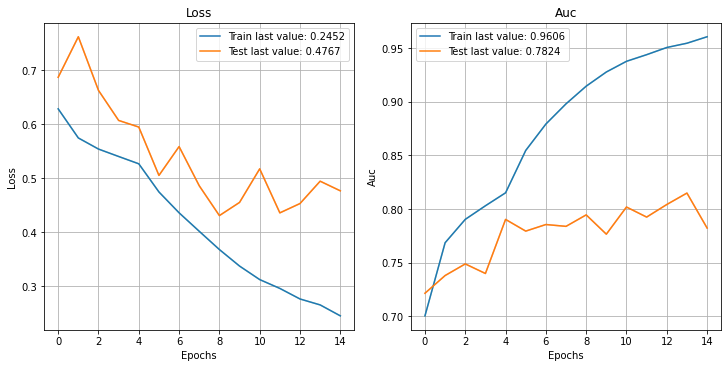

[9.8409975e-01 1.3562064e-07 8.5405118e-05 ... 5.2653957e-04 4.8894494e-06
 8.6129779e-01]
CPU times: user 13min 8s, sys: 1min 9s, total: 14min 17s
Wall time: 12min 40s


In [ ]:
%%time
# just run this cell
trainfun('GNN_Edge_MLP','10')

> I was expecting an AUC score of ~0.78 because it gives me that score on local , but my score on kaggle was ~0.83 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well.

> Let's try k-fold cross-validation.

In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_10.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a> Trials with K-fold cross-validation</a>

> ## KFold vs StratifiedKFold 

>* KFold :  As the name suggests, KFold divides the dataset into k folds.
>* StratifiedKFold : takes the cross validation one step further. The class distribution in the dataset is preserved in the training and test splits. And to ensure that each fold of dataset has the same proportion of observations with a given label.

> So, it means that StratifiedKFold is the improved version of KFold

>  Therefore, in classifications tasks with imbalanced class distributions, we should prefer StratifiedKFold over KFold.

> [Source](https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869)

## Read SDF format data (structured-data format)

In [ ]:
#importing libraries
import numpy as np   
# IPython/Jupyter Notebook progressbar decorator for iterators.
from tqdm.notebook import tqdm 

# fun. to read sdf file, the chemical composition of a molecule is saved as (structure data file)
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file
        content = rf.read()       #reading the contents of the file
    # Split the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$') 
    
    #fun. to read each molecule configuration
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        #loop over each line
        for l in lines:           
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            # for Atom block 
            if l.startswith('    '):   
                feature = l.split()
                #node feature (atom) as O,C etc.
                node = feature[3] 
                #appending nodes    
                nodes.append(node) 
            # bond block tells about connections between atoms   
            elif l.startswith(' '):   
                # splitting line
                lnk = l.split()       
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    #appending links
                    links.append((int(lnk[0])-1, int(lnk[1])-1,))
        return nodes, np.array(links), label #return nodes, links and label
    # parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  

In [ ]:
from sklearn.model_selection import train_test_split , StratifiedKFold
#reading train.sdf file
training_set = read_sdf('train.sdf')

  0%|          | 0/25024 [00:00<?, ?it/s]

In [ ]:
#reading test file
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

> Split the data into random train and test subsets.

> Note : Because we don't know if test data will be balanced or not , the oversample only on training dataset.

> If we balance the validation set our model may work well (may get better score in Val) but in the future after deploying, it may not work better so while training, validate with imbalance data only.

In [ ]:
#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

Imbalanced data

In [ ]:
np.unique(np.array(training_set)[:,2],return_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(array([0, 1], dtype=object), array([20224,  1046]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


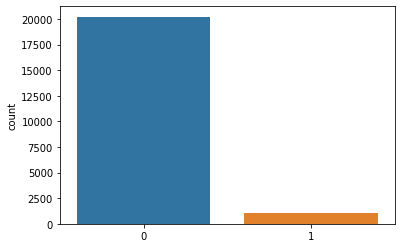

In [ ]:
#"sns" is the standard alias.
import seaborn as sns
sns.countplot(np.array(training_set)[:,2])

In [ ]:
import pandas as pd

In [ ]:
X_train = pd.DataFrame(np.array(training_set)[:,:-1])
y_train = pd.DataFrame(np.array(training_set)[:,2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
from sklearn.utils import resample
def resamplingDataPrep(X_train, y_train, target_var): 
    
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = y_train.values
    
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    
    # sample with replacement to match majority class reproducible results
    minority_class_after = resample(minority_class, replace=True,n_samples=20237,random_state=42)
    print('minority_class_after: '+ str(len(minority_class_after)))
    return majority_class, minority_class_after

# call resamplingDataPrep fun.
z1,z2 = resamplingDataPrep(X_train,y_train,2)

majority_class: 20224
minority_class: 1046
minority_class_after: 20237


In [ ]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([z1, z2])

In [ ]:
# Display new class counts
df_upsampled[2].value_counts()

1    20237
0    20224
Name: 2, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


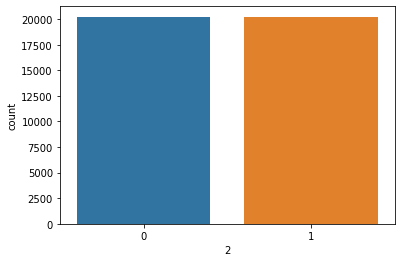

In [ ]:
# just run this cell
sns.countplot(df_upsampled[2])

In [ ]:
# convert our dataFrame to list
training_set = df_upsampled.values.tolist()

In [ ]:
# convert our data to dataframe
df = pd.DataFrame(training_set) 
# to put our lable in another variable
l = list(df[2])

In [ ]:
# libraries for displaying network of molecule
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [ ]:
# fun. to visualize the compound graph atoms are given as nodes the connections are defined as edges

def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0] #atoms as nodes
    edges = sample[1] #connections as edges
    #create dictionary for labels of the nodes
    labeldict={} 
    #create array for each node color
    node_color=[] 
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i)   #adding node to the graph each node as (0,1,2..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #color coding

    # a list of nodes for each edge by adding egde to the graph from one connection to other connection
    for e in edges:
        G.add_edge(e[0], e[1])

    #drawing the graph with labels for nodes as atoms and connections as edges    
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    #returns graph
    return G

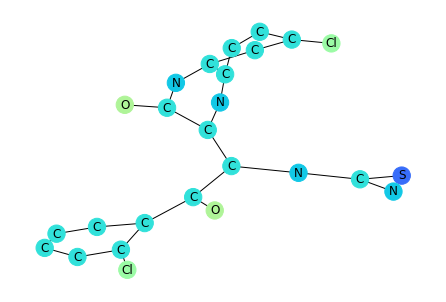

In [ ]:
#displaying one sample
plt.clf()
visualize(training_set[0])

## Preprocessing
> * Tokenizing the nodes(atoms)
> * With Different vocabulary size

In [ ]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer

#vocabulary size
max_vocab = 500
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [ ]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
# random seed
random.seed(0) 


# fun. to prepare single batch set Samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples] # Nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)   # tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post')  # pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1] #shape: (num of samples, number of nodes) 
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]  #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non-zero
    # definition for segmented_ids
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  
    
    all_nodes = np.reshape(sample_nodes, -1)  #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)         #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples]) 


#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:                 #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #randomly shuffling
        l = len(dataset)  #length of dataset
        for ndx in range(0, l, batch_size):  #loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)   #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break

In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=10):
    for k,v in train_batch[0].items(): #k: labels, v: values
        print(k)        
        print(v)
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

In [ ]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

#for deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput

     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 134 kB 46.0 MB/s 
     |████████████████████████████████| 1.2 MB 43.4 MB/s 
     |████████████████████████████████| 346 kB 48.2 MB/s 
     |████████████████████████████████| 462 kB 44.8 MB/s 
     |████████████████████████████████| 3.6 MB 32.4 MB/s 
     |████████████████████████████████| 178 kB 48.1 MB/s 
     |████████████████████████████████| 79 kB 6.9 MB/s 
     |████████████████████████████████| 85 kB 1.6 MB/s 
     |████████████████████████████████| 41 kB 270 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [ ]:
#importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.math import segment_mean # to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model # layers and model
from tensorflow.keras.layers import Embedding, Dense # layers
from tensorflow.keras.optimizers import Adam # optimizer


In [ ]:
skf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42)

In [ ]:
train = training_set

In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

def trainfun(model_name,trial_no):
  for fold,(idxT,idxV) in enumerate(skf.split(train,l)):
    
    # put samples for each data set
    training_set = [train[i] for i in idxT]
    validation_set =  [train[i] for i in idxV]
   

    # The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.
    #Input layer for nodes (tokenized text data) , eg. [440]
    data = keras.Input(batch_shape=(None,))

    # the first dim is different to the previous one. it is the total number of edges in this batch
    edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge data, eg. [257,2]
    node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids , eg. [440]
    embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

    # number of graphs (number of samples)
    num_graph = tf.reduce_max(node2graph)+1

    #gnn_input layer with inputs as defined above
    gnn_input = GNNInput(
        node_features=embeded,
        adjacency_lists=(edge,),
        node_to_graph_map=node2graph, 
        num_graphs=num_graph,
    )

    # https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
    params = GNN.get_default_hyperparameters()
    params["message_calculation_class"] = model_name
    params["hidden_dim"] = 128 #defining hidden dimension of the gnn layer
    params["num_layers"] = 8
    params["dense_every_num_layers"] = 8
    params["num_heads"] = 4
    params["num_aggr_MLP_hidden_layers"] = 1
    params["film_parameter_MLP_hidden_layers"] = 1

    #gnn layer with defined hyperparameters
    gnn_layer = GNN(params)

    #gnn output layer 
    gnn_out = gnn_layer(gnn_input)

    print('gnn_out', gnn_out)

    # https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )
    print('mean:', avg)

    #final dense layer with sigmoid
    pred = Dense(1, activation='sigmoid')(avg)# binary classification: Dense(2), but here we only output 1 probability
    print('pred:', pred)

    #building model inputs are data,edges and node2graph
    #output: prediction value from dense layer
    model = Model(inputs={'data': data,'edges': edge,'node2grah': node2graph,},outputs=pred)


    # to save the best epoch with the best parameters
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(f"{model_name}_{fold}.h5", monitor='val_auc', verbose=1, save_best_only=True,save_weights_only=True, mode='max', save_freq='epoch')

    # we will use different callbacks
    early_stopping_cb = tf.keras.callbacks.EarlyStopping( monitor="val_auc",min_delta=1e-3, patience=10, verbose=0,mode="max", baseline=None, restore_best_weights=True,)



    # we will use Adam Optimizer with different learning rate.
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer = optimizer, loss='BinaryCrossentropy', metrics=['AUC'])

    import math

    batch_size = 64
    #math.ceil: returns the smallest integral value greater than the number
    num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
    num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

    # fit our model with 20 epocks and different batch_size.
    history = model.fit(
        # gen_batch for training data set
        gen_batch(training_set, batch_size=batch_size, repeat=True),
        steps_per_epoch=num_batchs,
        epochs=15,
        # gen_batch for validation data set
        validation_data=gen_batch(validation_set, batch_size=batch_size, repeat=True),
        validation_steps=num_batchs_validation,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')],)

    # show the history of our model
    show_history(history)
    plot_history(history, path="standard.png")
    plt.close()


    # to predict our model
    y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
    # to reshape y_pred
    y_pred = np.reshape(y_pred, -1)
    print(y_pred)

    import pandas as pd 
    # create datafram with y_pred & id columns
    submission = pd.DataFrame({'label':y_pred})
    submission.index.name = 'id'
    # convert the dataframe to csv file
    submission.to_csv('sample_submission_trial_'+trial_no+'.csv')


# <a>Trial_11: RGCN with 4 K-folds</a>





gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a lar

475/475 [==============================] - 61s 82ms/step - loss: 0.6802 - auc: 0.5946 - val_loss: 0.6715 - val_auc: 0.6415
Epoch 2/15
475/475 [==============================] - 31s 66ms/step - loss: 0.6514 - auc: 0.6702 - val_loss: 0.6380 - val_auc: 0.6919
Epoch 3/15
475/475 [==============================] - 33s 70ms/step - loss: 0.6215 - auc: 0.7139 - val_loss: 0.6223 - val_auc: 0.7173
Epoch 4/15
475/475 [==============================] - 31s 66ms/step - loss: 0.6077 - auc: 0.7239 - val_loss: 0.6075 - val_auc: 0.7245
Epoch 5/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6038 - auc: 0.7269 - val_loss: 0.6031 - val_auc: 0.7267
Epoch 6/15
475/475 [==============================] - 31s 65ms/step - loss: 0.5982 - auc: 0.7328 - val_loss: 0.6008 - val_auc: 0.7320
Epoch 7/15
475/475 [==============================] - 32s 68ms/step - loss: 0.5939 - auc: 0.7376 - val_loss: 0.6005 - val_auc: 0.7330
Epoch 8/15
475/475 [==============================] - 31s 66ms/step - los

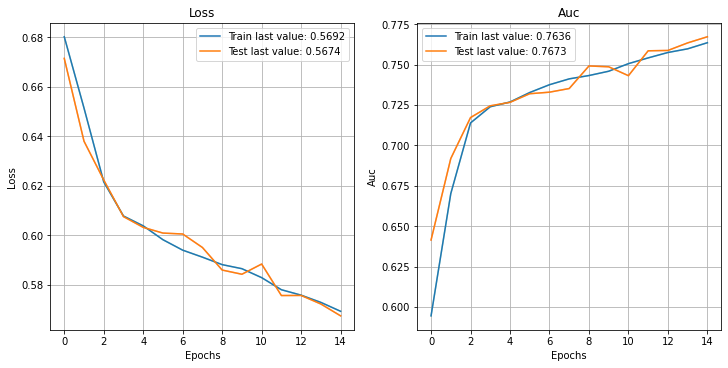

[0.9481622  0.7244285  0.32901004 ... 0.264285   0.10155788 0.28307053]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgcn_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

475/475 [==============================] - 37s 67ms/step - loss: 0.6816 - auc: 0.5909 - val_loss: 0.6714 - val_auc: 0.6386
Epoch 2/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6553 - auc: 0.6698 - val_loss: 0.6397 - val_auc: 0.6972
Epoch 3/15
475/475 [==============================] - 31s 66ms/step - loss: 0.6258 - auc: 0.7075 - val_loss: 0.6158 - val_auc: 0.7148
Epoch 4/15
475/475 [==============================] - 32s 66ms/step - loss: 0.6116 - auc: 0.7203 - val_loss: 0.6135 - val_auc: 0.7163
Epoch 5/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6035 - auc: 0.7283 - val_loss: 0.6008 - val_auc: 0.7332
Epoch 6/15
475/475 [==============================] - 31s 66ms/step - loss: 0.5969 - auc: 0.7361 - val_loss: 0.5925 - val_auc: 0.7411
Epoch 7/15
475/475 [==============================] - 31s 66ms/step - loss: 0.5913 - auc: 0.7399 - val_loss: 0.5864 - val_auc: 0.7477
Epoch 8/15
475/475 [==============================] - 31s 66ms/step - los

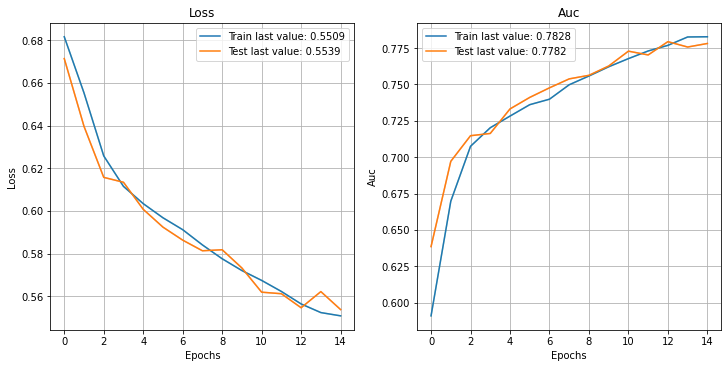

[0.93910795 0.6618886  0.34563503 ... 0.24893486 0.8037242  0.34095564]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgcn_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

475/475 [==============================] - 38s 67ms/step - loss: 0.6815 - auc: 0.5847 - val_loss: 0.6721 - val_auc: 0.6363
Epoch 2/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6553 - auc: 0.6771 - val_loss: 0.6195 - val_auc: 0.7207
Epoch 3/15
475/475 [==============================] - 31s 66ms/step - loss: 0.6171 - auc: 0.7203 - val_loss: 0.6082 - val_auc: 0.7242
Epoch 4/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6109 - auc: 0.7210 - val_loss: 0.6022 - val_auc: 0.7284
Epoch 5/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6033 - auc: 0.7289 - val_loss: 0.6026 - val_auc: 0.7261
Epoch 6/15
475/475 [==============================] - 31s 65ms/step - loss: 0.5998 - auc: 0.7324 - val_loss: 0.5971 - val_auc: 0.7328
Epoch 7/15
475/475 [==============================] - 31s 65ms/step - loss: 0.5963 - auc: 0.7352 - val_loss: 0.5954 - val_auc: 0.7376
Epoch 8/15
475/475 [==============================] - 31s 64ms/step - los

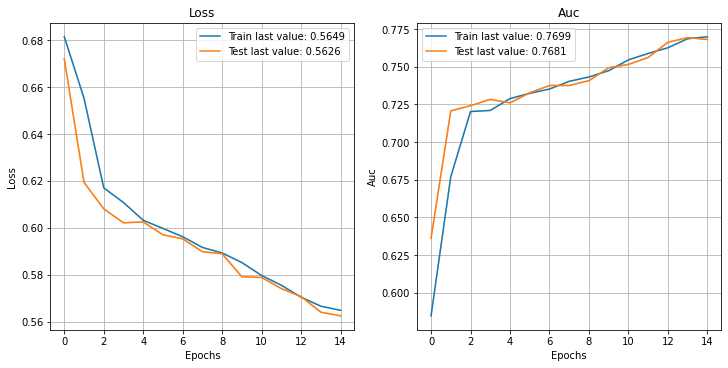

[0.9186592  0.80043906 0.5936674  ... 0.17200026 0.8217235  0.25920674]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_3/SegmentMean:0', description="created by layer 'tf.math.segment_mean_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgcn_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

475/475 [==============================] - 37s 67ms/step - loss: 0.6824 - auc: 0.5834 - val_loss: 0.6710 - val_auc: 0.6440
Epoch 2/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6515 - auc: 0.6785 - val_loss: 0.6335 - val_auc: 0.7125
Epoch 3/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6199 - auc: 0.7163 - val_loss: 0.6112 - val_auc: 0.7275
Epoch 4/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6089 - auc: 0.7229 - val_loss: 0.6025 - val_auc: 0.7326
Epoch 5/15
475/475 [==============================] - 31s 65ms/step - loss: 0.6008 - auc: 0.7314 - val_loss: 0.6047 - val_auc: 0.7257
Epoch 6/15
475/475 [==============================] - 31s 66ms/step - loss: 0.5980 - auc: 0.7346 - val_loss: 0.5959 - val_auc: 0.7416
Epoch 7/15
475/475 [==============================] - 32s 66ms/step - loss: 0.5944 - auc: 0.7375 - val_loss: 0.5864 - val_auc: 0.7490
Epoch 8/15
475/475 [==============================] - 32s 67ms/step - los

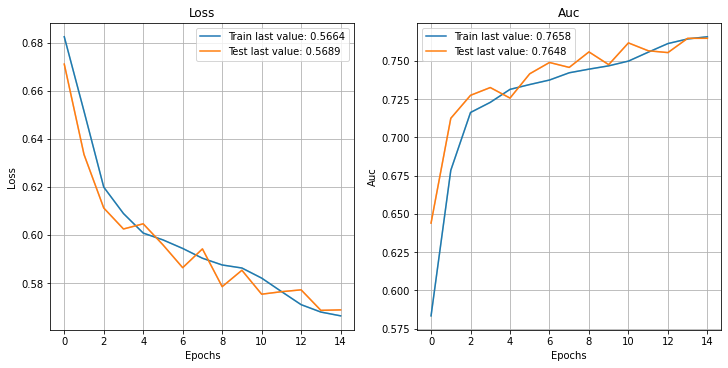

[0.92525244 0.65705734 0.4578438  ... 0.2389425  0.66082424 0.26271424]
CPU times: user 32min 37s, sys: 2min 20s, total: 34min 57s
Wall time: 33min 45s


In [ ]:
%%time
# just run this cell
trainfun('rgcn','11')

> I was expecting an AUC score of ~0.76 because it gives me that score on local , but my score on kaggle was ~0.79 this was the opposite of my expectations.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well.

>Let's try another trial


In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_11.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_12: GGNN with 4 K-folds</a>





gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_4/StatefulPartitionedCall:0', description="created by layer 'gnn_4'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_4/SegmentMean:0', description="created by layer 'tf.math.segment_mean_4'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_4/Sigmoid:0', description="created by layer 'dense_4'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_7/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_6/embedding_lookup_grad/Cast:0",

475/475 [==============================] - 74s 124ms/step - loss: 0.6691 - auc: 0.6161 - val_loss: 0.6469 - val_auc: 0.6668
Epoch 2/15
475/475 [==============================] - 53s 113ms/step - loss: 0.6334 - auc: 0.6926 - val_loss: 0.6269 - val_auc: 0.7024
Epoch 3/15
475/475 [==============================] - 53s 112ms/step - loss: 0.6204 - auc: 0.7117 - val_loss: 0.6088 - val_auc: 0.7261
Epoch 4/15
475/475 [==============================] - 53s 111ms/step - loss: 0.6048 - auc: 0.7302 - val_loss: 0.6030 - val_auc: 0.7353
Epoch 5/15
475/475 [==============================] - 54s 113ms/step - loss: 0.6017 - auc: 0.7349 - val_loss: 0.6004 - val_auc: 0.7410
Epoch 6/15
475/475 [==============================] - 53s 112ms/step - loss: 0.5992 - auc: 0.7377 - val_loss: 0.5960 - val_auc: 0.7471
Epoch 7/15
475/475 [==============================] - 53s 113ms/step - loss: 0.5919 - auc: 0.7456 - val_loss: 0.5928 - val_auc: 0.7476
Epoch 8/15
475/475 [==============================] - 53s 112ms/st

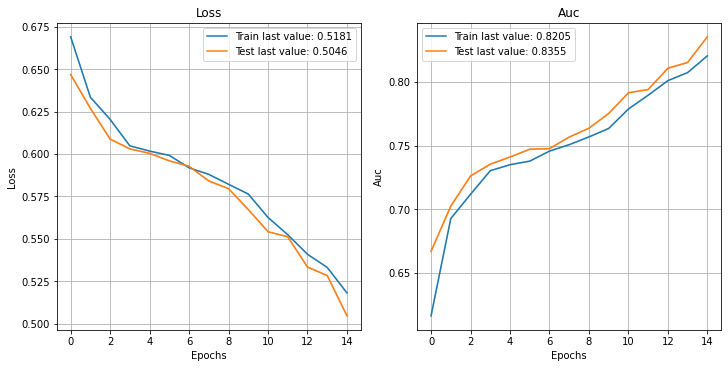

[0.95341235 0.71291703 0.04941939 ... 0.19294623 0.9487899  0.2546844 ]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_5/SegmentMean:0', description="created by layer 'tf.math.segment_mean_5'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_7/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_6/embedding_lookup_grad/Cast:0",

475/475 [==============================] - 61s 115ms/step - loss: 0.6674 - auc: 0.6221 - val_loss: 0.6442 - val_auc: 0.6694
Epoch 2/15
475/475 [==============================] - 54s 113ms/step - loss: 0.6282 - auc: 0.6996 - val_loss: 0.6155 - val_auc: 0.7151
Epoch 3/15
475/475 [==============================] - 53s 112ms/step - loss: 0.6116 - auc: 0.7228 - val_loss: 0.6060 - val_auc: 0.7288
Epoch 4/15
475/475 [==============================] - 53s 112ms/step - loss: 0.6052 - auc: 0.7294 - val_loss: 0.6021 - val_auc: 0.7336
Epoch 5/15
475/475 [==============================] - 53s 112ms/step - loss: 0.5985 - auc: 0.7380 - val_loss: 0.6014 - val_auc: 0.7405
Epoch 6/15
475/475 [==============================] - 54s 113ms/step - loss: 0.5958 - auc: 0.7401 - val_loss: 0.5896 - val_auc: 0.7476
Epoch 7/15
475/475 [==============================] - 53s 112ms/step - loss: 0.5846 - auc: 0.7520 - val_loss: 0.5844 - val_auc: 0.7535
Epoch 8/15
475/475 [==============================] - 54s 113ms/st

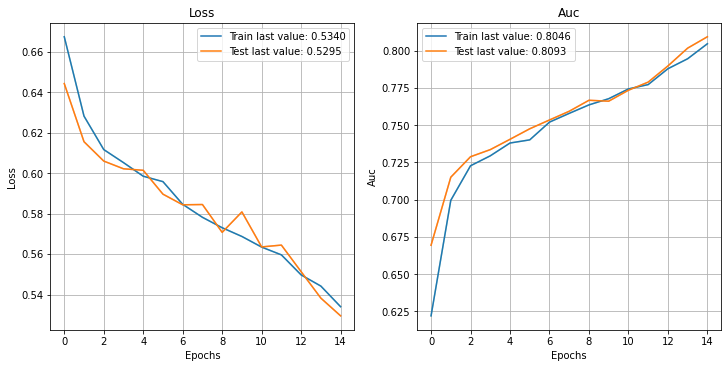

[0.8881908  0.1900105  0.3091124  ... 0.19330928 0.12120258 0.10655515]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_6/StatefulPartitionedCall:0', description="created by layer 'gnn_6'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_6/SegmentMean:0', description="created by layer 'tf.math.segment_mean_6'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_6/Sigmoid:0', description="created by layer 'dense_6'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_7/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_6/embedding_lookup_grad/Cast:0",

475/475 [==============================] - 61s 114ms/step - loss: 0.6695 - auc: 0.6148 - val_loss: 0.6520 - val_auc: 0.6651
Epoch 2/15
475/475 [==============================] - 53s 112ms/step - loss: 0.6298 - auc: 0.6987 - val_loss: 0.6105 - val_auc: 0.7244
Epoch 3/15
475/475 [==============================] - 53s 112ms/step - loss: 0.6080 - auc: 0.7262 - val_loss: 0.6064 - val_auc: 0.7301
Epoch 4/15
475/475 [==============================] - 53s 111ms/step - loss: 0.6023 - auc: 0.7342 - val_loss: 0.6078 - val_auc: 0.7323
Epoch 5/15
475/475 [==============================] - 53s 111ms/step - loss: 0.5976 - auc: 0.7380 - val_loss: 0.6028 - val_auc: 0.7357
Epoch 6/15
475/475 [==============================] - 53s 111ms/step - loss: 0.5963 - auc: 0.7401 - val_loss: 0.5979 - val_auc: 0.7393
Epoch 7/15
475/475 [==============================] - 53s 113ms/step - loss: 0.5931 - auc: 0.7431 - val_loss: 0.5899 - val_auc: 0.7482
Epoch 8/15
475/475 [==============================] - 54s 113ms/st

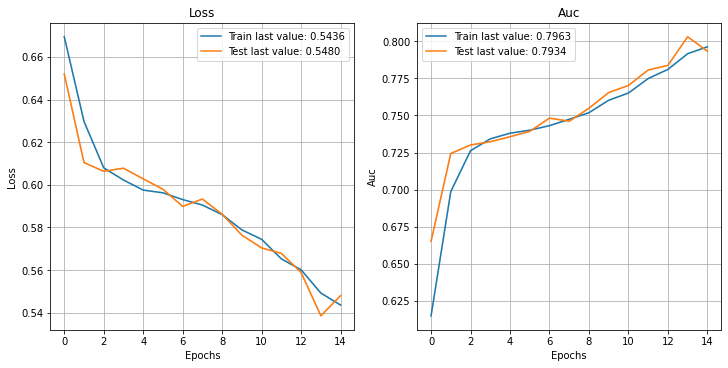

[0.9665495  0.86147577 0.2848074  ... 0.30113274 0.26527914 0.5400956 ]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_7/StatefulPartitionedCall:0', description="created by layer 'gnn_7'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_7/SegmentMean:0', description="created by layer 'tf.math.segment_mean_7'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_7/Sigmoid:0', description="created by layer 'dense_7'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_7/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/ggnn_6/embedding_lookup_grad/Cast:0",

475/475 [==============================] - 62s 114ms/step - loss: 0.6656 - auc: 0.6261 - val_loss: 0.6362 - val_auc: 0.6928
Epoch 2/15
475/475 [==============================] - 53s 112ms/step - loss: 0.6248 - auc: 0.7038 - val_loss: 0.6139 - val_auc: 0.7250
Epoch 3/15
475/475 [==============================] - 53s 112ms/step - loss: 0.6103 - auc: 0.7241 - val_loss: 0.6087 - val_auc: 0.7276
Epoch 4/15
475/475 [==============================] - 53s 111ms/step - loss: 0.6046 - auc: 0.7303 - val_loss: 0.5963 - val_auc: 0.7449
Epoch 5/15
475/475 [==============================] - 53s 113ms/step - loss: 0.6007 - auc: 0.7358 - val_loss: 0.6047 - val_auc: 0.7350
Epoch 6/15
475/475 [==============================] - 53s 111ms/step - loss: 0.5940 - auc: 0.7431 - val_loss: 0.5896 - val_auc: 0.7585
Epoch 7/15
475/475 [==============================] - 53s 111ms/step - loss: 0.5853 - auc: 0.7532 - val_loss: 0.5743 - val_auc: 0.7678
Epoch 8/15
475/475 [==============================] - 53s 112ms/st

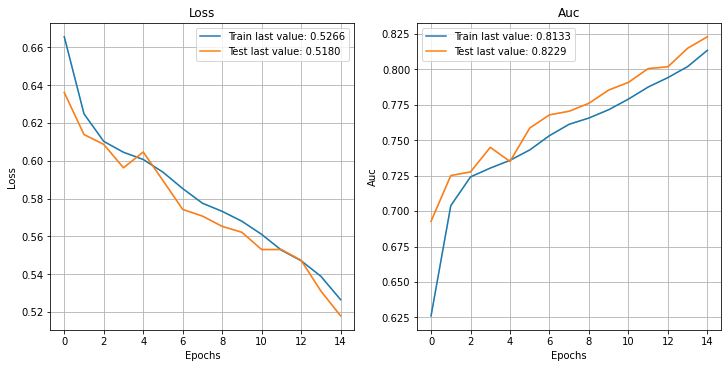

[0.95703524 0.9098942  0.1538251  ... 0.37854216 0.33153898 0.24751979]
CPU times: user 48min 27s, sys: 2min 34s, total: 51min 2s
Wall time: 56min


In [ ]:
%%time
# just run this cell
trainfun('ggnn','12')

> I was expecting an AUC score of ~0.82 because it gives me that score on local , but my score on kaggle was ~0.82 this was the opposite of my expectations.

> And I always changed the hyperparameters a several times hoping to increase the accuracy but as we can see there is a lot of overfitting because the data is very unbalanced.

> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well.


In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_12.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_13: RGAT with 4 K-folds</a>





gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_9/StatefulPartitionedCall:0', description="created by layer 'gnn_9'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_8/SegmentMean:0', description="created by layer 'tf.math.segment_mean_8'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_8/Sigmoid:0', description="created by layer 'dense_8'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amo

475/475 [==============================] - 64s 109ms/step - loss: 0.6820 - auc: 0.5838 - val_loss: 0.6703 - val_auc: 0.6485
Epoch 2/15
475/475 [==============================] - 50s 106ms/step - loss: 0.6487 - auc: 0.6808 - val_loss: 0.6362 - val_auc: 0.6918
Epoch 3/15
475/475 [==============================] - 49s 102ms/step - loss: 0.6207 - auc: 0.7127 - val_loss: 0.6148 - val_auc: 0.7101
Epoch 4/15
475/475 [==============================] - 49s 103ms/step - loss: 0.6077 - auc: 0.7247 - val_loss: 0.6007 - val_auc: 0.7348
Epoch 5/15
475/475 [==============================] - 49s 103ms/step - loss: 0.5989 - auc: 0.7342 - val_loss: 0.5985 - val_auc: 0.7300
Epoch 6/15
475/475 [==============================] - 48s 102ms/step - loss: 0.5934 - auc: 0.7403 - val_loss: 0.5888 - val_auc: 0.7485
Epoch 7/15
475/475 [==============================] - 49s 103ms/step - loss: 0.5873 - auc: 0.7482 - val_loss: 0.5852 - val_auc: 0.7509
Epoch 8/15
475/475 [==============================] - 49s 102ms/st

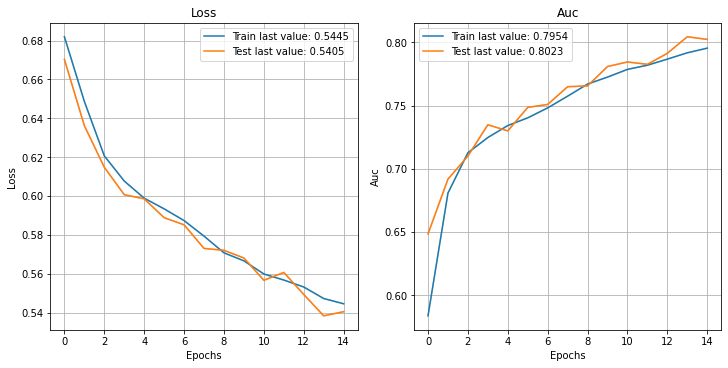

[0.87741816 0.8639629  0.23437266 ... 0.23098947 0.7194649  0.40453026]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_10/StatefulPartitionedCall:0', description="created by layer 'gnn_10'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_9/SegmentMean:0', description="created by layer 'tf.math.segment_mean_9'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_9/Sigmoid:0', description="created by layer 'dense_9'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/concat_3:0", shape=(None,), dtype=int32), values=Tensor("gradients/concat_2:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgat_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of me

475/475 [==============================] - 61s 107ms/step - loss: 0.6814 - auc: 0.5931 - val_loss: 0.6725 - val_auc: 0.6403
Epoch 2/15
475/475 [==============================] - 50s 104ms/step - loss: 0.6569 - auc: 0.6687 - val_loss: 0.6399 - val_auc: 0.6883
Epoch 3/15
475/475 [==============================] - 51s 107ms/step - loss: 0.6313 - auc: 0.6994 - val_loss: 0.6271 - val_auc: 0.7029
Epoch 4/15
475/475 [==============================] - 51s 107ms/step - loss: 0.6153 - auc: 0.7186 - val_loss: 0.6088 - val_auc: 0.7252
Epoch 5/15
475/475 [==============================] - 50s 106ms/step - loss: 0.6019 - auc: 0.7331 - val_loss: 0.6024 - val_auc: 0.7430
Epoch 6/15
475/475 [==============================] - 50s 106ms/step - loss: 0.5963 - auc: 0.7402 - val_loss: 0.5943 - val_auc: 0.7451
Epoch 7/15
475/475 [==============================] - 50s 106ms/step - loss: 0.5914 - auc: 0.7449 - val_loss: 0.5923 - val_auc: 0.7444
Epoch 8/15
475/475 [==============================] - 50s 106ms/st

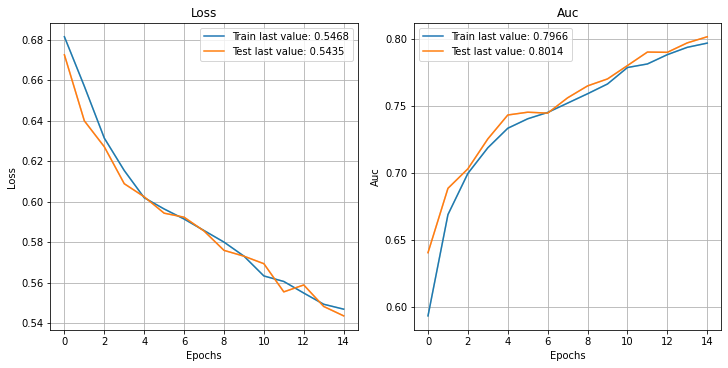

[0.9575514  0.77309877 0.44163036 ... 0.22382733 0.7510788  0.39431736]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_11/StatefulPartitionedCall:0', description="created by layer 'gnn_11'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_10/SegmentMean:0', description="created by layer 'tf.math.segment_mean_10'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_10/Sigmoid:0', description="created by layer 'dense_10'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/concat_3:0", shape=(None,), dtype=int32), values=Tensor("gradients/concat_2:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgat_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of me

475/475 [==============================] - 61s 107ms/step - loss: 0.6813 - auc: 0.5874 - val_loss: 0.6723 - val_auc: 0.6386
Epoch 2/15
475/475 [==============================] - 51s 107ms/step - loss: 0.6566 - auc: 0.6661 - val_loss: 0.6336 - val_auc: 0.7032
Epoch 3/15
475/475 [==============================] - 52s 110ms/step - loss: 0.6236 - auc: 0.7124 - val_loss: 0.6091 - val_auc: 0.7247
Epoch 4/15
475/475 [==============================] - 51s 107ms/step - loss: 0.6078 - auc: 0.7255 - val_loss: 0.6048 - val_auc: 0.7285
Epoch 5/15
475/475 [==============================] - 51s 107ms/step - loss: 0.6003 - auc: 0.7332 - val_loss: 0.6041 - val_auc: 0.7267
Epoch 6/15
475/475 [==============================] - 52s 109ms/step - loss: 0.5943 - auc: 0.7390 - val_loss: 0.5901 - val_auc: 0.7423
Epoch 7/15
475/475 [==============================] - 51s 107ms/step - loss: 0.5864 - auc: 0.7484 - val_loss: 0.5850 - val_auc: 0.7495
Epoch 8/15
475/475 [==============================] - 51s 107ms/st

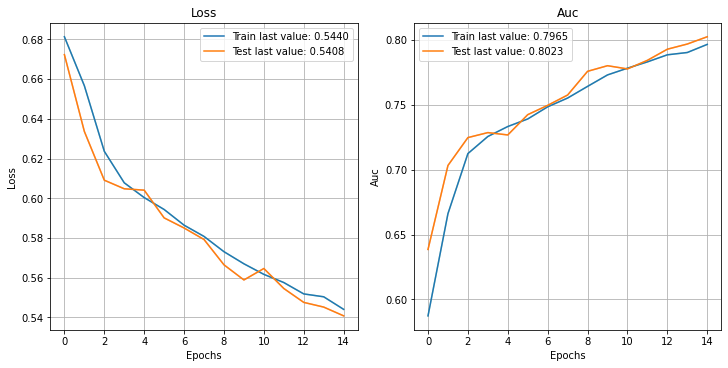

[0.84314907 0.7910675  0.3991346  ... 0.22824375 0.71404076 0.36226964]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_12/StatefulPartitionedCall:0', description="created by layer 'gnn_12'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_11/SegmentMean:0', description="created by layer 'tf.math.segment_mean_11'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_11/Sigmoid:0', description="created by layer 'dense_11'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/concat_3:0", shape=(None,), dtype=int32), values=Tensor("gradients/concat_2:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgat_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of me

475/475 [==============================] - 65s 113ms/step - loss: 0.6821 - auc: 0.5875 - val_loss: 0.6721 - val_auc: 0.6452
Epoch 2/15
475/475 [==============================] - 52s 110ms/step - loss: 0.6573 - auc: 0.6607 - val_loss: 0.6322 - val_auc: 0.7036
Epoch 3/15
475/475 [==============================] - 52s 110ms/step - loss: 0.6219 - auc: 0.7129 - val_loss: 0.6165 - val_auc: 0.7246
Epoch 4/15
475/475 [==============================] - 53s 111ms/step - loss: 0.6127 - auc: 0.7242 - val_loss: 0.6066 - val_auc: 0.7348
Epoch 5/15
475/475 [==============================] - 52s 110ms/step - loss: 0.6037 - auc: 0.7317 - val_loss: 0.5964 - val_auc: 0.7451
Epoch 6/15
475/475 [==============================] - 52s 110ms/step - loss: 0.5961 - auc: 0.7391 - val_loss: 0.5928 - val_auc: 0.7486
Epoch 7/15
475/475 [==============================] - 53s 111ms/step - loss: 0.5888 - auc: 0.7478 - val_loss: 0.5881 - val_auc: 0.7491
Epoch 8/15
475/475 [==============================] - 52s 110ms/st

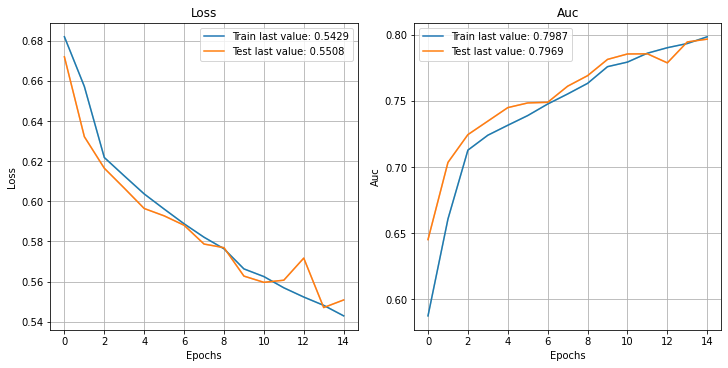

[0.8933351  0.22919638 0.23276359 ... 0.19466028 0.29939008 0.23571615]
CPU times: user 59min 43s, sys: 5min 36s, total: 1h 5min 19s
Wall time: 54min 14s


In [ ]:
%%time
# just run this cell
trainfun('rgat','13')

> I was expecting an AUC score of ~0.79 because it gives me that score on local , but my score on kaggle was ~0.82 this was the opposite of my expectations.


> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well.


In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_13.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a>Trial_14: RGIN with 4 K-folds</a>





gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_13/StatefulPartitionedCall:0', description="created by layer 'gnn_13'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_12/SegmentMean:0', description="created by layer 'tf.math.segment_mean_12'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_12/Sigmoid:0', description="created by layer 'dense_12'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgin_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

475/475 [==============================] - 42s 76ms/step - loss: 0.6768 - auc: 0.6037 - val_loss: 0.6524 - val_auc: 0.6735
Epoch 2/15
475/475 [==============================] - 36s 75ms/step - loss: 0.6315 - auc: 0.6888 - val_loss: 0.6224 - val_auc: 0.6972
Epoch 3/15
475/475 [==============================] - 35s 75ms/step - loss: 0.6144 - auc: 0.7125 - val_loss: 0.6164 - val_auc: 0.7177
Epoch 4/15
475/475 [==============================] - 36s 75ms/step - loss: 0.6058 - auc: 0.7246 - val_loss: 0.5998 - val_auc: 0.7321
Epoch 5/15
475/475 [==============================] - 35s 74ms/step - loss: 0.5971 - auc: 0.7363 - val_loss: 0.5918 - val_auc: 0.7441
Epoch 6/15
475/475 [==============================] - 36s 75ms/step - loss: 0.5824 - auc: 0.7531 - val_loss: 0.5700 - val_auc: 0.7708
Epoch 7/15
475/475 [==============================] - 35s 74ms/step - loss: 0.5705 - auc: 0.7694 - val_loss: 0.5702 - val_auc: 0.7743
Epoch 8/15
475/475 [==============================] - 35s 74ms/step - los

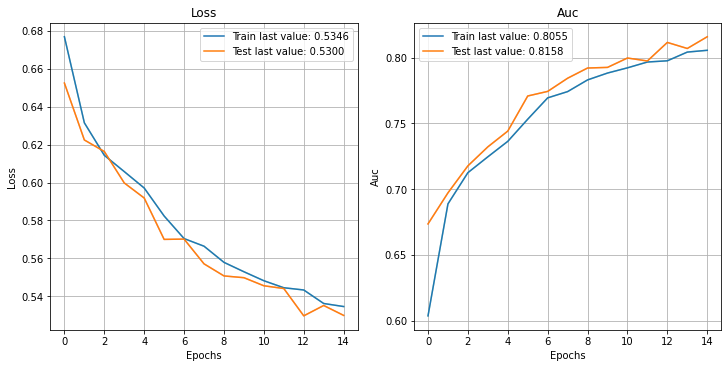

[0.8336405  0.57672465 0.0306051  ... 0.1578539  0.66699415 0.17307395]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_14/StatefulPartitionedCall:0', description="created by layer 'gnn_14'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_13/SegmentMean:0', description="created by layer 'tf.math.segment_mean_13'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_13/Sigmoid:0', description="created by layer 'dense_13'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgin_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

475/475 [==============================] - 44s 77ms/step - loss: 0.6804 - auc: 0.5955 - val_loss: 0.6659 - val_auc: 0.6544
Epoch 2/15
475/475 [==============================] - 36s 76ms/step - loss: 0.6337 - auc: 0.6911 - val_loss: 0.6171 - val_auc: 0.7110
Epoch 3/15
475/475 [==============================] - 36s 76ms/step - loss: 0.6079 - auc: 0.7241 - val_loss: 0.6043 - val_auc: 0.7342
Epoch 4/15
475/475 [==============================] - 36s 75ms/step - loss: 0.5982 - auc: 0.7351 - val_loss: 0.5938 - val_auc: 0.7425
Epoch 5/15
475/475 [==============================] - 36s 76ms/step - loss: 0.5866 - auc: 0.7497 - val_loss: 0.5791 - val_auc: 0.7598
Epoch 6/15
475/475 [==============================] - 35s 75ms/step - loss: 0.5763 - auc: 0.7586 - val_loss: 0.5717 - val_auc: 0.7645
Epoch 7/15
475/475 [==============================] - 35s 74ms/step - loss: 0.5684 - auc: 0.7676 - val_loss: 0.5657 - val_auc: 0.7731
Epoch 8/15
475/475 [==============================] - 35s 74ms/step - los

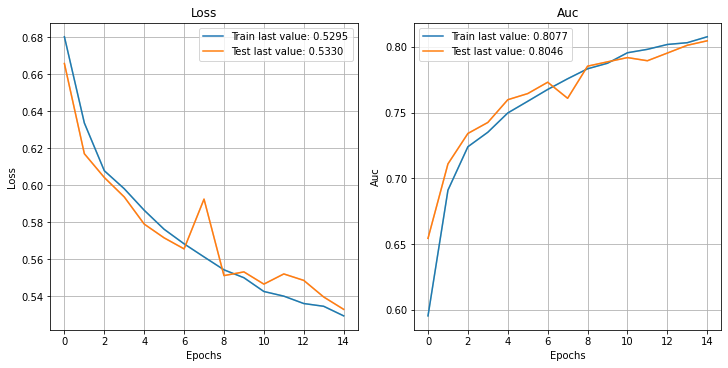

[0.8790386  0.719389   0.2519856  ... 0.16717966 0.83230484 0.21566257]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_15/StatefulPartitionedCall:0', description="created by layer 'gnn_15'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_14/SegmentMean:0', description="created by layer 'tf.math.segment_mean_14'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_14/Sigmoid:0', description="created by layer 'dense_14'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgin_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

475/475 [==============================] - 42s 77ms/step - loss: 0.6783 - auc: 0.6040 - val_loss: 0.6533 - val_auc: 0.6840
Epoch 2/15
475/475 [==============================] - 36s 75ms/step - loss: 0.6373 - auc: 0.6988 - val_loss: 0.6290 - val_auc: 0.6947
Epoch 3/15
475/475 [==============================] - 35s 74ms/step - loss: 0.6127 - auc: 0.7200 - val_loss: 0.6195 - val_auc: 0.7163
Epoch 4/15
475/475 [==============================] - 35s 75ms/step - loss: 0.6002 - auc: 0.7324 - val_loss: 0.5967 - val_auc: 0.7391
Epoch 5/15
475/475 [==============================] - 35s 75ms/step - loss: 0.5913 - auc: 0.7434 - val_loss: 0.5835 - val_auc: 0.7513
Epoch 6/15
475/475 [==============================] - 35s 75ms/step - loss: 0.5830 - auc: 0.7520 - val_loss: 0.5933 - val_auc: 0.7556
Epoch 7/15
475/475 [==============================] - 35s 75ms/step - loss: 0.5787 - auc: 0.7581 - val_loss: 0.5679 - val_auc: 0.7687
Epoch 8/15
475/475 [==============================] - 35s 74ms/step - los

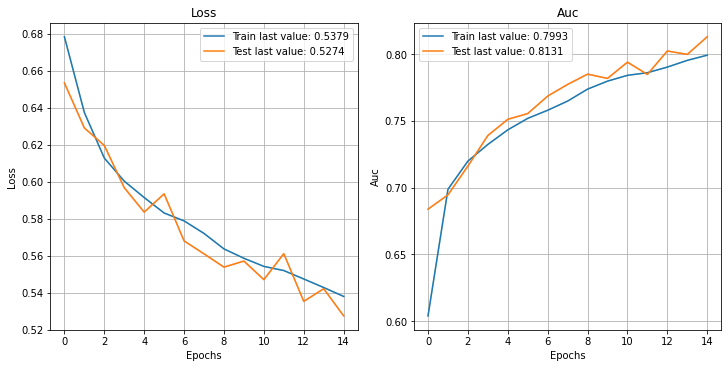

[0.370916   0.83051884 0.3006606  ... 0.26156226 0.5654427  0.24730255]
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='gnn_16/StatefulPartitionedCall:0', description="created by layer 'gnn_16'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.segment_mean_15/SegmentMean:0', description="created by layer 'tf.math.segment_mean_15'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_15/Sigmoid:0', description="created by layer 'dense_15'")
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_7_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_7_grad/Identity:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/cond_7_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgin_6/embedding_lookup_grad/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradients/rgin_6/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tens

475/475 [==============================] - 44s 78ms/step - loss: 0.6774 - auc: 0.6061 - val_loss: 0.6664 - val_auc: 0.6672
Epoch 2/15
475/475 [==============================] - 37s 77ms/step - loss: 0.6378 - auc: 0.6839 - val_loss: 0.6178 - val_auc: 0.7125
Epoch 3/15
475/475 [==============================] - 36s 76ms/step - loss: 0.6113 - auc: 0.7192 - val_loss: 0.6002 - val_auc: 0.7353
Epoch 4/15
475/475 [==============================] - 36s 75ms/step - loss: 0.6010 - auc: 0.7328 - val_loss: 0.5878 - val_auc: 0.7530
Epoch 5/15
475/475 [==============================] - 36s 76ms/step - loss: 0.5883 - auc: 0.7495 - val_loss: 0.5778 - val_auc: 0.7617
Epoch 6/15
475/475 [==============================] - 36s 75ms/step - loss: 0.5777 - auc: 0.7623 - val_loss: 0.5722 - val_auc: 0.7732
Epoch 7/15
475/475 [==============================] - 36s 76ms/step - loss: 0.5671 - auc: 0.7735 - val_loss: 0.5560 - val_auc: 0.7861
Epoch 8/15
475/475 [==============================] - 35s 75ms/step - los

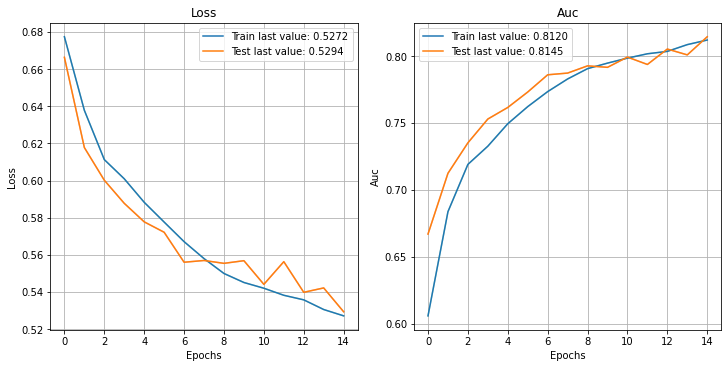

[0.96668094 0.92548835 0.04567025 ... 0.27544457 0.44947314 0.4644824 ]
CPU times: user 37min 6s, sys: 2min 21s, total: 39min 27s
Wall time: 37min 53s


In [ ]:
%%time
# just run this cell
trainfun('rgin','14')

> I was expecting an AUC score of ~0.81 because it gives me that score on local , but my score on kaggle was ~0.82 this was the opposite of my expectations.


> My observation for that score is that the model was good to reach this score , but the model suffering from the unbalanced dataset and the overfitting as well.


In [ ]:
from google.colab import files
# to download the csv file
files.download("sample_submission_trial_14.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **<a>The End**

> ### Overall,My trial (6) : GGNN with Upsampling on the training data and the validation data set, significantly assisted me in achieving my highest score on the leaderboard with score of (~0.87). Although I put in a lot of effort, in my processing_2 with **K-fold cross-validation** models and also that doesn't protect this model from overfitting.

# **<a>Resources.</a>**

There are a lot of resources, but these are among the most important sources that helped me and I learned from them.

**Note:** The code sources were mentioned, and even my friends who helped me in this competition assigned to each cell separately.



> [TF2-GNN](https://github.com/microsoft/tf2-gnn)

> [Segment_mean](https://www.tensorflow.org/api_docs/python/tf/math/segment_mean)

> [train test split kfold vs stratifiedkfold](https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869)

> [Keras History](https://pypi.org/project/plot-keras-history/)

>[Modeling Relational Data with Graph Convolutional Networks](https://arxiv.org/pdf/1703.06103.pdf)


>[Modeling relational data with graph](https://medium.com/analytics-vidhya/paper-series-2-modeling-relational-data-with-graph-convolutional-networks-schlichtkrull-et-al-b009ff48ab87)

>[Relational Graph Convolutional Networks](https://arxiv.org/pdf/2107.10015.pdf)

> [Relational Graph Attention Networks](https://github.com/babylonhealth/rgat)

> [Graph neural networks gnn](https://medium.com/analytics-vidhya/a-review-of-graph-neural-networks-gnn-560be37b8bca)

> [graph neural networks gnn gae stgnn](https://jonathan-hui.medium.com/graph-neural-networks-gnn-gae-stgnn-1ac0b5c99550)

> [YouTube](https://www.youtube.com/watch?v=8owQBFAHw7E&ab_channel=TensorFlow)

> [Resample Dataset](https://stackoverflow.com/questions/52735334/python-pandas-resample-dataset-to-have-balanced-classes)




 